In [1]:
#imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sci
import statistics as stats

from astropy.io import fits

import math

In [5]:
#set up data for tightly wound galaxy sample
tightgrad = fits.open("tight_ALLinfo.fits")
tightgrad = tightgrad[1].data

tightgrad_radiuscut = tightgrad[(tightgrad['radius'] > 0.5)]

tight_r = tightgrad_radiuscut['radius']
tight_m = tightgrad_radiuscut['metallicity']
tight_name = tightgrad_radiuscut['name_1']

tight_r = tight_r[np.logical_not(np.isnan(tight_m))]
tight_name = tight_name[np.logical_not(np.isnan(tight_m))]
tight_m = tight_m[np.logical_not(np.isnan(tight_m))]

tightgrad_low = tightgrad[(tightgrad['mass_1'] < 10.25)]
tightgrad_mid = tightgrad[(tightgrad['mass_1'] > 10.25) & (tightgrad['mass_1'] < 10.75)]
tightgrad_high = tightgrad[(tightgrad['mass_1'] > 10.75)]

10.60206719811365
1237
22.0
10.07513853461035
48.0
10.54480472702775
40.0
10.896566415259802
1237
['8144-12703' '8144-12703' '8144-12703' ... '11982-12704' '11982-12704'
 '11982-12704']


In [3]:
#set up data for loosely wound galaxy sample
loosegrad = fits.open("loose_ALLinfo.fits")
loosegrad = loosegrad[1].data

loosegrad_radiuscut = loosegrad[(loosegrad['radius'] > 0.5)]

loose_r = loosegrad_radiuscut['radius']
loose_m = loosegrad_radiuscut['metallicity']
loose_name = loosegrad_radiuscut['name_1']

loose_r = loose_r[np.logical_not(np.isnan(loose_m))]
loose_name = loose_name[np.logical_not(np.isnan(loose_m))]
loose_m = loose_m[np.logical_not(np.isnan(loose_m))]

loosegrad_low = loosegrad[(loosegrad['mass'] < 10.25)]
loosegrad_mid = loosegrad[(loosegrad['mass'] > 10.25) & (loosegrad['mass'] < 10.75)]
loosegrad_high = loosegrad[(loosegrad['mass'] > 10.75)]

10.338674775710299
661
661
29.0
9.95527119998196
21.0
10.5357510513264
14.0
11.09115183032845


In [4]:
#set up data for mediumly wound galaxy sample 
mediumgrad = fits.open("medium_ALLinfo.fits")
mediumgrad = mediumgrad[1].data

mediumgrad_radiuscut = mediumgrad[(mediumgrad['radius'] > 0.5)]

medium_r = mediumgrad_radiuscut['radius']
medium_m = mediumgrad_radiuscut['metallicity']
medium_name = mediumgrad_radiuscut['name_1']

medium_r = medium_r[np.logical_not(np.isnan(medium_m))]
medium_name = medium_name[np.logical_not(np.isnan(medium_m))]
medium_m = medium_m[np.logical_not(np.isnan(medium_m))]

mediumgrad_low = mediumgrad[(mediumgrad['mass'] < 10.25)]
mediumgrad_mid = mediumgrad[(mediumgrad['mass'] > 10.25) & (mediumgrad['mass'] < 10.75)]
mediumgrad_high = mediumgrad[(mediumgrad['mass'] > 10.75)]

10.4809459936718


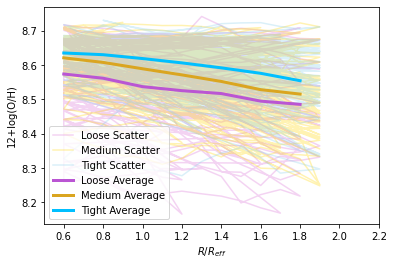

In [5]:
#plot all trends for each arm winding level sample and plot binned statistic of each sample over top 
plt.plot(loose_r,loose_m, alpha = 0.3, color = 'orchid', label = 'Loose Scatter')#, s = 25) #Use this to check where the values are which are being averaged 

plt.plot(medium_r,medium_m, alpha = 0.3, color = 'gold', label = 'Medium Scatter')#, s = 25) #Use this to check where the values are which are being averaged 

plt.plot(tight_r,tight_m, alpha = 0.3, color = 'skyblue', label = 'Tight Scatter')#, s = 25) #Use this to check where the values are which are being averaged 

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(loose_r,loose_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, linewidth = 3, color = 'mediumorchid', label = 'Loose Average')

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(medium_r,medium_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, linewidth = 3, color = 'goldenrod', label = 'Medium Average')

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(tight_r,tight_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, linewidth = 3, color = 'deepskyblue', label = 'Tight Average')


plt.xlim(0.5,2.2)
#plt.ylim(8.4,8.8)
plt.xlabel(r'$ R/R_{eff}$')
plt.ylabel("12+log(O/H)")
plt.legend()

bothavggrad_name = 'Plots/bothbinnedgradients.pdf'
plt.savefig(bothavggrad_name, bbox_inches='tight')

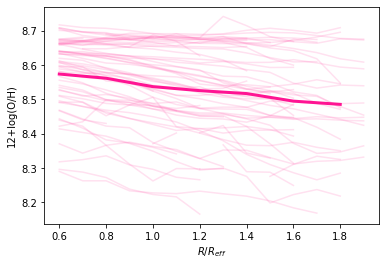

In [6]:
#splitting the above plot into three separate plots bc easier to look at
#loosely wound spiral arms 
plateifu_list = np.unique(np.array(loose_name))
for plateifu in plateifu_list: 
    thisdata =loosegrad_radiuscut['name_1']== plateifu
    plt.plot(loosegrad_radiuscut['radius'][thisdata], loosegrad_radiuscut['metallicity'][thisdata], color = 'hotpink', alpha = 0.2, label = 'Individual Galaxies')
meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(loose_r,loose_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, linewidth = 3, color = 'deeppink', label = 'Loose Average')
plt.xlabel(r'$ R/R_{eff}$')
plt.ylabel("12+log(O/H)")
#plt.legend()

loose_all_name = 'Plots/loose_all_avgoverplot.pdf'
plt.savefig(loose_all_name, bbox_inches='tight')

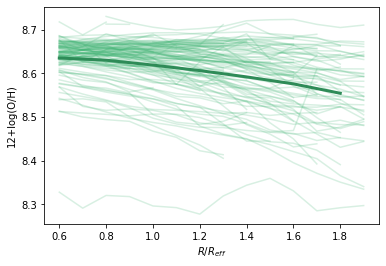

In [7]:
#tightly wound spiral arms
plateifu_list = np.unique(np.array(tight_name))
for plateifu in plateifu_list: 
    thisdata =tightgrad_radiuscut['name_1']== plateifu
    plt.plot(tightgrad_radiuscut['radius'][thisdata], tightgrad_radiuscut['metallicity'][thisdata], color = 'mediumseagreen', alpha = 0.2, label = 'Individual Galaxies')
meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(tight_r,tight_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, linewidth = 3, color = 'seagreen', label = 'Tight Average')
plt.xlabel(r'$ R/R_{eff}$')
plt.ylabel("12+log(O/H)")
#plt.legend()

tight_all_name = 'Plots/tight_all_avgoverplot.pdf'
plt.savefig(tight_all_name, bbox_inches='tight')

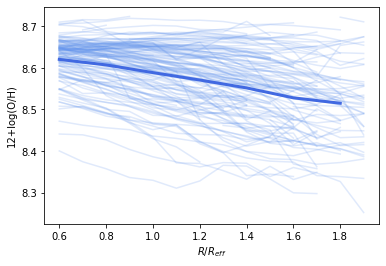

In [8]:
#medium wound spiral arms
plateifu_list = np.unique(np.array(medium_name))
for plateifu in plateifu_list: 
    thisdata =mediumgrad_radiuscut['name_1']== plateifu
    plt.plot(mediumgrad_radiuscut['radius'][thisdata], mediumgrad_radiuscut['metallicity'][thisdata], color = 'cornflowerblue', alpha = 0.2, label = 'Individual Galaxies')
meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(medium_r,medium_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, linewidth = 3, color = 'royalblue', label = 'Medium Average')
plt.xlabel(r'$ R/R_{eff}$')
plt.ylabel("12+log(O/H)")
#plt.legend()

medium_all_name = 'Plots/medium_all_avgoverplot.pdf'
plt.savefig(medium_all_name, bbox_inches='tight')

### Making mass bins within each arm winding sample
Plotting scatter of values for all galaxies within each sample and binned satistic overtop allows us to make sure that the binned statistic is properly tracing the values it is being calculated over. 

20.3
14.7
9.8


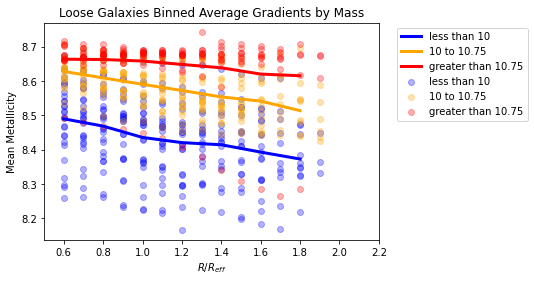

In [11]:
#creating mass bins for loosely wound arm sample
loose_low = loosegrad_radiuscut[(loosegrad_radiuscut["mass"] < 10.25)]
loose_mid = loosegrad_radiuscut[(loosegrad_radiuscut["mass"] > 10.25) & (loosegrad_radiuscut["mass"] < 10.75)]
loose_high = loosegrad_radiuscut[(loosegrad_radiuscut['mass'] > 10.75)]

#saving data as lists to more easily manipulate
loose_low_r = loose_low['radius']
loose_low_m = loose_low['metallicity']
#clearing out nan values 
loose_low_r = loose_low_r[np.logical_not(np.isnan(loose_low_m))]
loose_low_m = loose_low_m[np.logical_not(np.isnan(loose_low_m))]

loose_mid_r = loose_mid['radius']
loose_mid_m = loose_mid['metallicity']
loose_mid_r = loose_mid_r[np.logical_not(np.isnan(loose_mid_m))]
loose_mid_m = loose_mid_m[np.logical_not(np.isnan(loose_mid_m))]

loose_high_r = loose_high['radius']
loose_high_m = loose_high['metallicity']
loose_high_r = loose_high_r[np.logical_not(np.isnan(loose_high_m))]
loose_high_m = loose_high_m[np.logical_not(np.isnan(loose_high_m))]

#plotting
plt.scatter(loose_low_r,loose_low_m, color = 'blue', alpha = 0.3, label = 'less than 10') #Use this to check where the values are which are being averaged. May not always need it. 

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(loose_low_r,loose_low_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'blue', linewidth = 3, label = 'less than 10')

plt.scatter(loose_mid_r,loose_mid_m, color = 'orange', alpha = 0.3, label = '10 to 10.75') #Use this to check where the values are which are being averaged. May not always need it. 

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(loose_mid_r,loose_mid_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'orange', linewidth = 3, label = '10 to 10.75')

plt.scatter(loose_high_r,loose_high_m, color = 'red', alpha = 0.3, label = 'greater than 10.75') #Use this to check where the values are which are being averaged. May not always need it. 

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(loose_high_r,loose_high_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'red', linewidth = 3, label = 'greater than 10.75')

plt.xlim(0.5,2.2)
#plt.ylim(8.4,8.8)
plt.xlabel(r'$ R/R_{eff}$')
plt.ylabel('Mean Metallicity')
plt.title('Loose Galaxies Binned Average Gradients by Mass')
plt.legend(bbox_to_anchor=(1.04, 1))

loose_grad_mass_name = 'Plots/loosebinnedgradients_mass_2.pdf'
plt.savefig(loose_grad_mass_name, bbox_inches='tight')

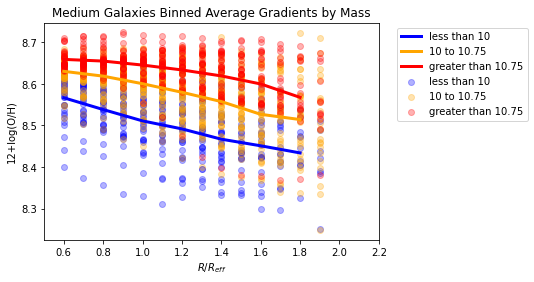

In [12]:
#creating mass bins for medium wound arm sample
medium_low = mediumgrad_radiuscut[(mediumgrad_radiuscut["mass"] < 10.25)]
medium_mid = mediumgrad_radiuscut[(mediumgrad_radiuscut["mass"] > 10.25) & (mediumgrad_radiuscut["mass"] < 10.75)]
medium_high = mediumgrad_radiuscut[(mediumgrad_radiuscut['mass'] > 10.75)]

#saving data as lists to more easily manipulate
medium_low_r = medium_low['radius']
medium_low_m = medium_low['metallicity']
#clearing out nan values
medium_low_r = medium_low_r[np.logical_not(np.isnan(medium_low_m))]
medium_low_m = medium_low_m[np.logical_not(np.isnan(medium_low_m))]

medium_mid_r = medium_mid['radius']
medium_mid_m = medium_mid['metallicity']
medium_mid_r = medium_mid_r[np.logical_not(np.isnan(medium_mid_m))]
medium_mid_m = medium_mid_m[np.logical_not(np.isnan(medium_mid_m))]

medium_high_r = medium_high['radius']
medium_high_m = medium_high['metallicity']
medium_high_r = medium_high_r[np.logical_not(np.isnan(medium_high_m))]
medium_high_m = medium_high_m[np.logical_not(np.isnan(medium_high_m))]

#plotting
plt.scatter(medium_low_r,medium_low_m, color = 'blue', alpha = 0.3, label = 'less than 10') #Use this to check where the values are which are being averaged. May not always need it. 

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(medium_low_r,medium_low_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'blue', linewidth = 3, label = 'less than 10')

plt.scatter(medium_mid_r,medium_mid_m, color = 'orange', alpha = 0.3, label = '10 to 10.75') #Use this to check where the values are which are being averaged. May not always need it. 

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(medium_mid_r,medium_mid_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'orange', linewidth = 3, label = '10 to 10.75')

plt.scatter(medium_high_r,medium_high_m, color = 'red', alpha = 0.3, label = 'greater than 10.75') #Use this to check where the values are which are being averaged. May not always need it. 

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(medium_high_r,medium_high_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'red', linewidth = 3, label = 'greater than 10.75')

plt.xlim(0.5,2.2)
#plt.ylim(8.4,8.8)
plt.xlabel(r'$ R/R_{eff}$')
plt.ylabel("12+log(O/H)")
plt.title('Medium Galaxies Binned Average Gradients by Mass')
plt.legend(bbox_to_anchor=(1.04, 1))

medium_grad_mass_name = 'Plots/mediumbinnedgradients_mass_2.pdf'
plt.savefig(medium_grad_mass_name, bbox_inches='tight')

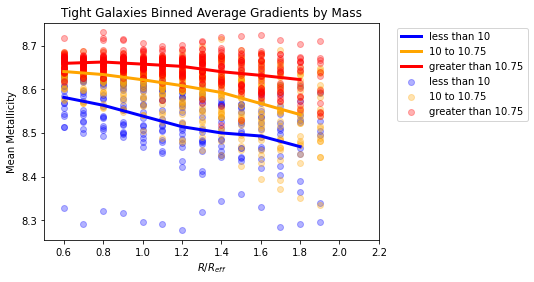

In [14]:
#same as two examples above but for tightly wound arm sample 
tight_low = tightgrad_radiuscut[(tightgrad_radiuscut["mass_1"] < 10.25)]
tight_mid = tightgrad_radiuscut[(tightgrad_radiuscut["mass_1"] > 10.25) & (tightgrad_radiuscut["mass_1"] < 10.75)]
tight_high = tightgrad_radiuscut[(tightgrad_radiuscut['mass_1'] > 10.75)]

tight_low_r = tight_low['radius']
tight_low_m = tight_low['metallicity']
tight_low_r = tight_low_r[np.logical_not(np.isnan(tight_low_m))]
tight_low_m = tight_low_m[np.logical_not(np.isnan(tight_low_m))]

tight_mid_r = tight_mid['radius']
tight_mid_m = tight_mid['metallicity']
tight_mid_r = tight_mid_r[np.logical_not(np.isnan(tight_mid_m))]
tight_mid_m = tight_mid_m[np.logical_not(np.isnan(tight_mid_m))]

tight_high_r = tight_high['radius']
tight_high_m = tight_high['metallicity']
tight_high_r = tight_high_r[np.logical_not(np.isnan(tight_high_m))]
tight_high_m = tight_high_m[np.logical_not(np.isnan(tight_high_m))]

plt.scatter(tight_low_r,tight_low_m, color = 'blue', alpha = 0.3, label = 'less than 10') #Use this to check where the values are which are being averaged. May not always need it. 

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(tight_low_r,tight_low_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'blue', linewidth = 3, label = 'less than 10')

plt.scatter(tight_mid_r,tight_mid_m, color = 'orange', alpha = 0.3, label = '10 to 10.75') #Use this to check where the values are which are being averaged. May not always need it. 

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(tight_mid_r,tight_mid_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'orange', linewidth = 3, label = '10 to 10.75')

plt.scatter(tight_high_r,tight_high_m, color = 'red', alpha = 0.3, label = 'greater than 10.75') #Use this to check where the values are which are being averaged. May not always need it. 

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(tight_high_r,tight_high_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'red', linewidth = 3, label = 'greater than 10.75')

plt.xlim(0.5,2.2)
#plt.ylim(8.4,8.8)
plt.xlabel(r'$ R/R_{eff}$')
plt.ylabel('Mean Metallicity')
plt.title('Tight Galaxies Binned Average Gradients by Mass')
plt.legend(bbox_to_anchor=(1.04, 1))

tight_grad_mass_name = 'Plots/tightbinnedgradients_mass_2.pdf'
plt.savefig(tight_grad_mass_name, bbox_inches='tight')

In [17]:
#fitting linear regressions to all trends in each of the arm winding samples
loose_low_res = sci.linregress(loose_low_r, loose_low_m)
loose_mid_res = sci.linregress(loose_mid_r, loose_mid_m)
loose_high_res = sci.linregress(loose_high_r, loose_high_m)

tight_low_res = sci.linregress(tight_low_r, tight_low_m)
tight_mid_res = sci.linregress(tight_mid_r, tight_mid_m)
tight_high_res = sci.linregress(tight_high_r, tight_high_m)

medium_low_res = sci.linregress(medium_low_r, medium_low_m)
medium_mid_res = sci.linregress(medium_mid_r, medium_mid_m)
medium_high_res = sci.linregress(medium_high_r, medium_high_m)

#saving median mass values for each of the nine subsamples
loose_low_med = stats.median(loose_low['mass'])
loose_mid_med = stats.median(loose_mid['mass'])
loose_high_med = stats.median(loose_high['mass'])

tight_low_med = stats.median(tight_low['mass_1'])
tight_mid_med = stats.median(tight_mid['mass_1'])
tight_high_med = stats.median(tight_high['mass_1'])

medium_low_med = stats.median(medium_low['mass'])
medium_mid_med = stats.median(medium_mid['mass'])
medium_high_med = stats.median(medium_high['mass'])

0.020101606995868798
-0.04180050960555609


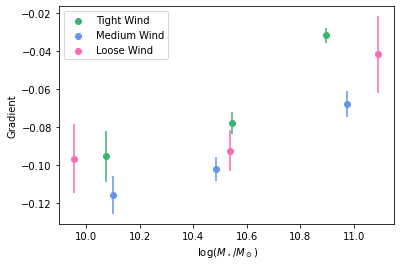

In [18]:
#plotting gradient/slope of linear regression fit to all data in each subsample vs median mass of each subsample
plt.scatter(tight_low_med, tight_low_res.slope, label = 'Tight Wind', color = 'mediumseagreen')
plt.scatter(medium_low_med, medium_low_res.slope, label = 'Medium Wind', color = 'cornflowerblue')
plt.scatter(loose_low_med, loose_low_res.slope, label = 'Loose Wind', color = 'hotpink')

plt.errorbar(tight_low_med, tight_low_res.slope, yerr = tight_low_res.stderr,  color = 'mediumseagreen')
plt.errorbar(medium_low_med, medium_low_res.slope, yerr = medium_low_res.stderr,  color = 'cornflowerblue')
plt.errorbar(loose_low_med, loose_low_res.slope, yerr = loose_low_res.stderr,  color = 'hotpink')

plt.scatter(tight_mid_med, tight_mid_res.slope, color = 'mediumseagreen')
plt.scatter(medium_mid_med, medium_mid_res.slope, color = 'cornflowerblue')
plt.scatter(loose_mid_med, loose_mid_res.slope, color = 'hotpink')

plt.errorbar(tight_mid_med, tight_mid_res.slope, yerr = tight_mid_res.stderr,  color = 'mediumseagreen')
plt.errorbar(medium_mid_med, medium_mid_res.slope, yerr = medium_mid_res.stderr,  color = 'cornflowerblue')
plt.errorbar(loose_mid_med, loose_mid_res.slope, yerr = loose_mid_res.stderr,  color = 'hotpink')

plt.scatter(tight_high_med, tight_high_res.slope, color = 'mediumseagreen')
plt.scatter(medium_high_med, medium_high_res.slope, color = 'cornflowerblue')
plt.scatter(loose_high_med, loose_high_res.slope, color = 'hotpink')

plt.errorbar(tight_high_med, tight_high_res.slope, yerr = tight_high_res.stderr, color = 'mediumseagreen')
plt.errorbar(medium_high_med, medium_high_res.slope, yerr = medium_high_res.stderr, color = 'cornflowerblue')
plt.errorbar(loose_high_med, loose_high_res.slope, yerr = loose_high_res.stderr, color = 'hotpink')

plt.xlabel(r' $\log (M_\star/M_\odot)$')
plt.ylabel('Gradient')
plt.legend(loc = 'upper left')

Text(0, 0.5, 'Offset')

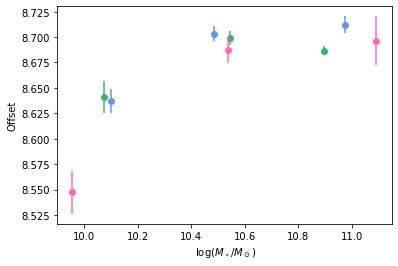

In [19]:
#same plot as above but mass vs offset/intercept of the nine regression fits
plt.scatter(tight_low_med, tight_low_res.intercept, label = 'tight low', color = 'mediumseagreen')
plt.scatter(medium_low_med, medium_low_res.intercept, label = 'medium low', color = 'cornflowerblue')
plt.scatter(loose_low_med, loose_low_res.intercept, label = 'loose low', color = 'hotpink')

plt.errorbar(tight_low_med, tight_low_res.intercept, yerr = tight_low_res.intercept_stderr, label = 'tight low', color = 'mediumseagreen')
plt.errorbar(medium_low_med, medium_low_res.intercept,yerr = medium_low_res.intercept_stderr, label = 'medium low', color = 'cornflowerblue')
plt.errorbar(loose_low_med, loose_low_res.intercept,yerr = loose_low_res.intercept_stderr, label = 'loose low', color = 'hotpink')

plt.scatter(tight_mid_med, tight_mid_res.intercept,label = 'tight mid', color = 'mediumseagreen')
plt.scatter(medium_mid_med, medium_mid_res.intercept, label = 'medium mid', color = 'cornflowerblue')
plt.scatter(loose_mid_med, loose_mid_res.intercept ,label = 'loose mid', color = 'hotpink')

plt.errorbar(tight_mid_med, tight_mid_res.intercept, yerr = tight_mid_res.intercept_stderr,label = 'tight mid', color = 'mediumseagreen')
plt.errorbar(medium_mid_med, medium_mid_res.intercept,yerr = medium_mid_res.intercept_stderr, label = 'medium mid', color = 'cornflowerblue')
plt.errorbar(loose_mid_med, loose_mid_res.intercept, yerr = loose_mid_res.intercept_stderr,label = 'loose mid', color = 'hotpink')

plt.scatter(tight_high_med, tight_high_res.intercept,label = 'tight high', color = 'mediumseagreen')
plt.scatter(medium_high_med, medium_high_res.intercept, label = 'medium high', color = 'cornflowerblue')
plt.scatter(loose_high_med, loose_high_res.intercept,label = 'loose high', color = 'hotpink')

plt.errorbar(tight_high_med, tight_high_res.intercept, yerr = tight_high_res.intercept_stderr,label = 'tight high', color = 'mediumseagreen')
plt.errorbar(medium_high_med, medium_high_res.intercept, yerr = medium_high_res.intercept_stderr,label = 'medium high', color = 'cornflowerblue')
plt.errorbar(loose_high_med, loose_high_res.intercept, yerr = loose_high_res.intercept_stderr,label = 'loose high', color = 'hotpink')

plt.xlabel(r' $\log (M_\star/M_\odot)$')
plt.ylabel('Offset')
#plt.legend(bbox_to_anchor=(1.04, 1))

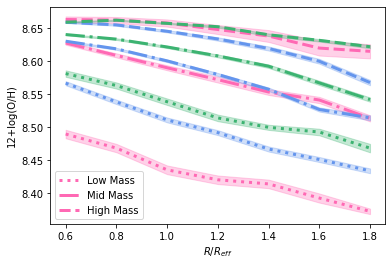

In [20]:
#plotting binned statistic averaged over all galaxies in each of the subsamples
#low mass sample plotting
#loose
meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(loose_low_r,loose_low_m,bins=10,range=(0,2.0))
meta_metal_std,meta_radius_std,binnumber = sci.binned_statistic(loose_low_r,loose_low_m,bins=10,range=(0,2.0), statistic = 'std')
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'hotpink', linewidth = 3, label = 'Low Mass', linestyle = ':')
plt.fill_between(meta_radius_mean[:-1],meta_metal_mean - (meta_metal_std/math.sqrt(280)), meta_metal_mean + (meta_metal_std/math.sqrt(280)), alpha = 0.3, color = 'hotpink')

#medium
meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(medium_low_r,medium_low_m,bins=10,range=(0,2.0))
meta_metal_std,meta_radius_std,binnumber = sci.binned_statistic(medium_low_r,medium_low_m,bins=10,range=(0,2.0), statistic = 'std')
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'cornflowerblue', linewidth = 3,  linestyle = ':')
plt.fill_between(meta_radius_mean[:-1],meta_metal_mean - (meta_metal_std/math.sqrt(376)), meta_metal_mean + (meta_metal_std/math.sqrt(376)), alpha = 0.3, color = 'cornflowerblue')

#tight
meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(tight_low_r,tight_low_m,bins=10,range=(0,2.0))
meta_metal_std,meta_radius_std,binnumber = sci.binned_statistic(tight_low_r,tight_low_m,bins=10,range=(0,2.0), statistic = 'std')
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'mediumseagreen', linewidth = 3,  linestyle = ':')
plt.fill_between(meta_radius_mean[:-1],meta_metal_mean - (meta_metal_std/math.sqrt(238)), meta_metal_mean + (meta_metal_std/math.sqrt(238)), alpha = 0.3, color = 'mediumseagreen')


#mid mass sample plotting
#loose
meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(loose_mid_r,loose_mid_m,bins=10,range=(0,2.0))
meta_metal_std,meta_radius_std,binnumber = sci.binned_statistic(loose_mid_r,loose_mid_m,bins=10,range=(0,2.0), statistic = 'std')
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'hotpink', linewidth = 3, label = 'Mid Mass', linestyle = '-.')
plt.fill_between(meta_radius_mean[:-1],meta_metal_mean - (meta_metal_std/math.sqrt(237)), meta_metal_mean + (meta_metal_std/math.sqrt(237)), alpha = 0.3, color = 'hotpink')

#medium
meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(medium_mid_r,medium_mid_m,bins=10,range=(0,2.0))
meta_metal_std,meta_radius_std,binnumber = sci.binned_statistic(medium_mid_r,medium_mid_m,bins=10,range=(0,2.0), statistic = 'std')
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'cornflowerblue', linewidth = 3,  linestyle = "-.")
plt.fill_between(meta_radius_mean[:-1],meta_metal_mean - (meta_metal_std/math.sqrt(727)), meta_metal_mean + (meta_metal_std/math.sqrt(727)), alpha = 0.3, color = 'cornflowerblue')

#tight
meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(tight_mid_r,tight_mid_m,bins=10,range=(0,2.0))
meta_metal_std,meta_radius_std,binnumber = sci.binned_statistic(tight_mid_r,tight_mid_m,bins=10,range=(0,2.0), statistic = 'std')
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'mediumseagreen', linewidth = 3,  linestyle = '-.')
plt.fill_between(meta_radius_mean[:-1],meta_metal_mean - (meta_metal_std/math.sqrt(568)), meta_metal_mean + (meta_metal_std/math.sqrt(568)), alpha = 0.3, color = 'mediumseagreen')

#high mass sample plotting
meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(loose_high_r,loose_high_m,bins=10,range=(0,2.0))
meta_metal_std,meta_radius_std,binnumber = sci.binned_statistic(loose_high_r,loose_high_m,bins=10,range=(0,2.0), statistic = 'std')
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'hotpink', linewidth = 3, label = 'High Mass', linestyle = '--')
plt.fill_between(meta_radius_mean[:-1],meta_metal_mean - (meta_metal_std/math.sqrt(144)), meta_metal_mean + (meta_metal_std/math.sqrt(144)), alpha = 0.3, color = 'hotpink')

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(medium_high_r,medium_high_m,bins=10,range=(0,2.0))
meta_metal_std,meta_radius_std,binnumber = sci.binned_statistic(medium_high_r,medium_high_m,bins=10,range=(0,2.0), statistic = 'std')
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'cornflowerblue', linewidth = 3, linestyle='--')
plt.fill_between(meta_radius_mean[:-1],meta_metal_mean - (meta_metal_std/math.sqrt(399)), meta_metal_mean + (meta_metal_std/math.sqrt(399)), alpha = 0.3, color = 'cornflowerblue')


meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(tight_high_r,tight_high_m,bins=10,range=(0,2.0))
meta_metal_std,meta_radius_std,binnumber = sci.binned_statistic(tight_high_r,tight_high_m,bins=10,range=(0,2.0), statistic = 'std')
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'mediumseagreen', linewidth = 3,  linestyle = '--')
plt.fill_between(meta_radius_mean[:-1],meta_metal_mean - (meta_metal_std/math.sqrt(431)), meta_metal_mean + (meta_metal_std/math.sqrt(431)), alpha = 0.3, color = 'mediumseagreen')


#plt.xlim(0.5,2)
#plt.ylim(8.4,8.8)
plt.xlabel(r'$ R/R_{eff}$')
plt.ylabel("12+log(O/H)")
#plt.title('Binned Average Gradients by Mass')
plt.legend(loc = 'lower left')

binned_mass_name = 'Plots/binned_avg_bymass.pdf'
plt.savefig(binned_mass_name, bbox_inches='tight')

280
376
238


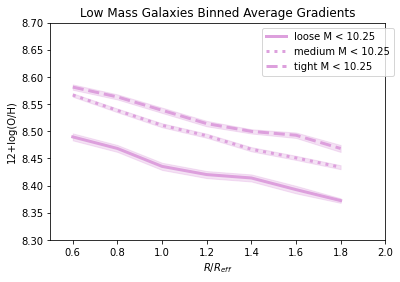

In [21]:
#splitting previous plot up into three plots by mass bins
#low mass bin
meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(loose_low_r,loose_low_m,bins=10,range=(0,2.0))
meta_metal_std,meta_radius_std,binnumber = sci.binned_statistic(loose_low_r,loose_low_m,bins=10,range=(0,2.0), statistic = 'std')
print(len(loose_low_r))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'plum', linewidth = 3, label = 'loose M < 10.25')
plt.fill_between(meta_radius_mean[:-1],meta_metal_mean - (meta_metal_std/math.sqrt(280)), meta_metal_mean + (meta_metal_std/math.sqrt(280)), alpha = 0.3, color = 'plum')

#plt.plot(loose_low_r, loose_low_res.intercept + loose_low_res.slope*loose_low_r, 'r', label='fitted line')

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(medium_low_r,medium_low_m,bins=10,range=(0,2.0))
meta_metal_std,meta_radius_std,binnumber = sci.binned_statistic(medium_low_r,medium_low_m,bins=10,range=(0,2.0), statistic = 'std')
print(len(medium_low_r))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'plum', linewidth = 3, label = 'medium M < 10.25', linestyle = ":")
plt.fill_between(meta_radius_mean[:-1],meta_metal_mean - (meta_metal_std/math.sqrt(376)), meta_metal_mean + (meta_metal_std/math.sqrt(376)), alpha = 0.3, color = 'plum')


meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(tight_low_r,tight_low_m,bins=10,range=(0,2.0))
meta_metal_std,meta_radius_std,binnumber = sci.binned_statistic(tight_low_r,tight_low_m,bins=10,range=(0,2.0), statistic = 'std')
print(len(tight_low_r))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'plum', linewidth = 3, label = 'tight M < 10.25', linestyle = '--')
plt.fill_between(meta_radius_mean[:-1],meta_metal_mean - (meta_metal_std/math.sqrt(238)), meta_metal_mean + (meta_metal_std/math.sqrt(238)), alpha = 0.3, color = 'plum')

#plt.plot(tight_low_r, tight_low_res.intercept + tight_low_res.slope*tight_low_r, 'r', label='fitted line')

plt.xlim(0.5,2)
plt.ylim(8.3,8.7)
plt.xlabel(r'$ R/R_{eff}$')
plt.ylabel("12+log(O/H)")
plt.title('Low Mass Galaxies Binned Average Gradients')
plt.legend(bbox_to_anchor=(1.04, 1))

low_mass_name = 'Plots/low_mass.pdf'
plt.savefig(low_mass_name, bbox_inches='tight')

237
727
568


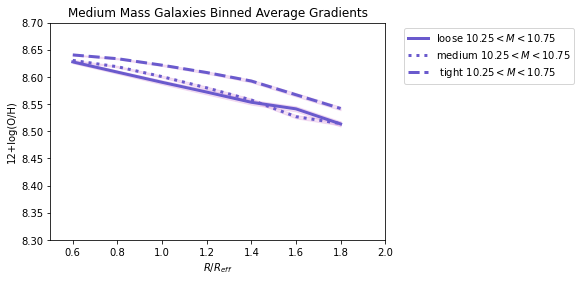

In [22]:
#medium mass bin
meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(loose_mid_r,loose_mid_m,bins=10,range=(0,2.0))
meta_metal_std,meta_radius_std,binnumber = sci.binned_statistic(loose_mid_r,loose_mid_m,bins=10,range=(0,2.0), statistic = 'std')
print(len(loose_mid_r))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'slateblue', linewidth = 3, label = (r'loose $ 10.25 < M < 10.75$'))
plt.fill_between(meta_radius_mean[:-1],meta_metal_mean - (meta_metal_std/math.sqrt(237)), meta_metal_mean + (meta_metal_std/math.sqrt(237)), alpha = 0.3, color = 'plum')

#plt.plot(loose_mid_r, loose_mid_res.intercept + loose_mid_res.slope*loose_mid_r, 'r', label='fitted line')

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(medium_mid_r,medium_mid_m,bins=10,range=(0,2.0))
meta_metal_std,meta_radius_std,binnumber = sci.binned_statistic(medium_mid_r,medium_mid_m,bins=10,range=(0,2.0), statistic = 'std')
print(len(medium_mid_r))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'slateblue', linewidth = 3, label = (r'medium $ 10.25 < M < 10.75$'), linestyle = ':')
plt.fill_between(meta_radius_mean[:-1],meta_metal_mean - (meta_metal_std/math.sqrt(727)), meta_metal_mean + (meta_metal_std/math.sqrt(727)), alpha = 0.3, color = 'plum')


meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(tight_mid_r,tight_mid_m,bins=10,range=(0,2.0))
meta_metal_std,meta_radius_std,binnumber = sci.binned_statistic(tight_mid_r,tight_mid_m,bins=10,range=(0,2.0), statistic = 'std')
print(len(tight_mid_r))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'slateblue', linewidth = 3, label = (r' tight $10.25 < M < 10.75$'), linestyle = '--')
plt.fill_between(meta_radius_mean[:-1],meta_metal_mean - (meta_metal_std/math.sqrt(568)), meta_metal_mean + (meta_metal_std/math.sqrt(568)), alpha = 0.3, color = 'plum')

#plt.plot(tight_mid_r, tight_mid_res.intercept + tight_mid_res.slope*tight_mid_r, 'r', label='fitted line')

plt.xlim(0.5,2)
plt.ylim(8.3,8.7)
plt.xlabel(r'$ R/R_{eff}$')
plt.ylabel("12+log(O/H)")
plt.title('Medium Mass Galaxies Binned Average Gradients')
plt.legend(bbox_to_anchor=(1.04, 1))

mid_mass_name = 'Plots/mid_mass.pdf'
plt.savefig(mid_mass_name, bbox_inches='tight')

144
390
431


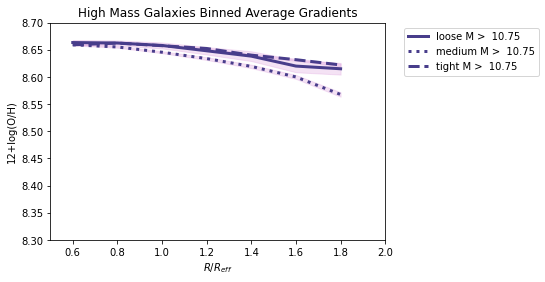

In [23]:
#high mass bin
meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(loose_high_r,loose_high_m,bins=10,range=(0,2.0))
meta_metal_std,meta_radius_std,binnumber = sci.binned_statistic(loose_high_r,loose_high_m,bins=10,range=(0,2.0), statistic = 'std')
print(len(loose_high_r))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'darkslateblue', linewidth = 3, label = 'loose M >  10.75')
plt.fill_between(meta_radius_mean[:-1],meta_metal_mean - (meta_metal_std/math.sqrt(144)), meta_metal_mean + (meta_metal_std/math.sqrt(144)), alpha = 0.3, color = 'plum')

#plt.plot(loose_high_r, loose_high_res.intercept + loose_high_res.slope*loose_high_r, 'r', label='fitted line')

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(medium_high_r,medium_high_m,bins=10,range=(0,2.0))
meta_metal_std,meta_radius_std,binnumber = sci.binned_statistic(medium_high_r,medium_high_m,bins=10,range=(0,2.0), statistic = 'std')
print(len(medium_high_r))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'darkslateblue', linewidth = 3, label = 'medium M >  10.75', linestyle = ':')
plt.fill_between(meta_radius_mean[:-1],meta_metal_mean - (meta_metal_std/math.sqrt(399)), meta_metal_mean + (meta_metal_std/math.sqrt(399)), alpha = 0.3, color = 'plum')


meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(tight_high_r,tight_high_m,bins=10,range=(0,2.0))
meta_metal_std,meta_radius_std,binnumber = sci.binned_statistic(tight_high_r,tight_high_m,bins=10,range=(0,2.0), statistic = 'std')
print(len(tight_high_r))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'darkslateblue', linewidth = 3, label = 'tight M >  10.75', linestyle = '--')
plt.fill_between(meta_radius_mean[:-1],meta_metal_mean - (meta_metal_std/math.sqrt(431)), meta_metal_mean + (meta_metal_std/math.sqrt(431)), alpha = 0.3, color = 'plum')

#plt.plot(tight_high_r, tight_high_res.intercept + tight_high_res.slope*tight_high_r, 'r', label='fitted line')

plt.xlim(0.5,2)
plt.ylim(8.3,8.7)
plt.xlabel(r'$ R/R_{eff}$')
plt.ylabel("12+log(O/H)")
plt.title('High Mass Galaxies Binned Average Gradients')
plt.legend(bbox_to_anchor=(1.04, 1))

high_mass_name = 'Plots/high_mass.pdf'
plt.savefig(high_mass_name, bbox_inches='tight')

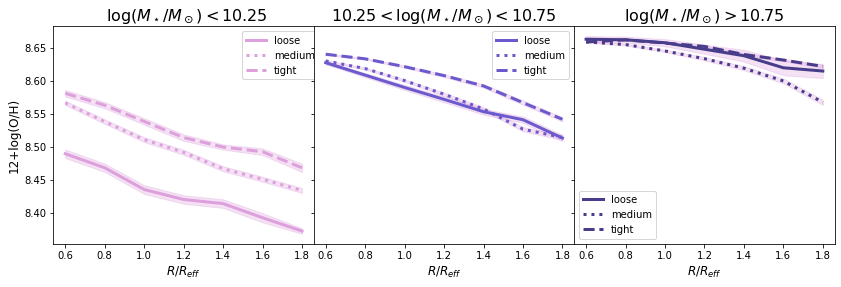

In [24]:
#plotting all 3 previous figures together in subplots
#Make a figure
fig1=plt.figure()
fig1.set_size_inches(14,4)
fig1.subplots_adjust(wspace=0, hspace=0)

nhigh = 1
nwide = 3
low=fig1.add_subplot(nhigh, nwide, 1)
medium=fig1.add_subplot(nhigh, nwide, 2, sharey=low)
high=fig1.add_subplot(nhigh, nwide, 3, sharey = low)

low.set_title(r' $\log (M_\star/M_\odot) < 10.25$', size=16)
medium.set_title(r'$ 10.25 <\log (M_\star/M_\odot) < 10.75$', size=16)
high.set_title(r'$\log (M_\star/M_\odot) > 10.75$', size=16)

for tick in low.yaxis.get_major_ticks():
    tick.label1.set_visible(True) 
    tick.label2.set_visible(False)
for tick in medium.yaxis.get_major_ticks():
    tick.label1.set_visible(False) 
    tick.label2.set_visible(False)
for tick in high.yaxis.get_major_ticks():
    tick.label1.set_visible(False) 
    tick.label2.set_visible(False)
    
low.set_ylabel("12+log(O/H)", size=12)
low.set_xlabel(r'$ R/R_{eff}$', size=12)
medium.set_xlabel(r'$ R/R_{eff}$', size=12)
high.set_xlabel(r'$ R/R_{eff}$', size=12)

#low
meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(loose_low_r,loose_low_m,bins=10,range=(0,2.0))
meta_metal_std,meta_radius_std,binnumber = sci.binned_statistic(loose_low_r,loose_low_m,bins=10,range=(0,2.0), statistic = 'std')
low.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'plum', linewidth = 3, label = 'loose')
low.fill_between(meta_radius_mean[:-1],meta_metal_mean - (meta_metal_std/math.sqrt(280)), meta_metal_mean + (meta_metal_std/math.sqrt(280)), alpha = 0.3, color = 'plum')

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(medium_low_r,medium_low_m,bins=10,range=(0,2.0))
meta_metal_std,meta_radius_std,binnumber = sci.binned_statistic(medium_low_r,medium_low_m,bins=10,range=(0,2.0), statistic = 'std')
low.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'plum', linewidth = 3, label = 'medium', linestyle = ":")
low.fill_between(meta_radius_mean[:-1],meta_metal_mean - (meta_metal_std/math.sqrt(376)), meta_metal_mean + (meta_metal_std/math.sqrt(376)), alpha = 0.3, color = 'plum')

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(tight_low_r,tight_low_m,bins=10,range=(0,2.0))
meta_metal_std,meta_radius_std,binnumber = sci.binned_statistic(tight_low_r,tight_low_m,bins=10,range=(0,2.0), statistic = 'std')
low.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'plum', linewidth = 3, label = 'tight', linestyle = '--')
low.fill_between(meta_radius_mean[:-1],meta_metal_mean - (meta_metal_std/math.sqrt(238)), meta_metal_mean + (meta_metal_std/math.sqrt(238)), alpha = 0.3, color = 'plum')

#medium
meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(loose_mid_r,loose_mid_m,bins=10,range=(0,2.0))
meta_metal_std,meta_radius_std,binnumber = sci.binned_statistic(loose_mid_r,loose_mid_m,bins=10,range=(0,2.0), statistic = 'std')
medium.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'slateblue', linewidth = 3, label = ('loose'))
medium.fill_between(meta_radius_mean[:-1],meta_metal_mean - (meta_metal_std/math.sqrt(237)), meta_metal_mean + (meta_metal_std/math.sqrt(237)), alpha = 0.3, color = 'plum')

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(medium_mid_r,medium_mid_m,bins=10,range=(0,2.0))
meta_metal_std,meta_radius_std,binnumber = sci.binned_statistic(medium_mid_r,medium_mid_m,bins=10,range=(0,2.0), statistic = 'std')
medium.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'slateblue', linewidth = 3, label = ('medium'), linestyle = ':')
medium.fill_between(meta_radius_mean[:-1],meta_metal_mean - (meta_metal_std/math.sqrt(727)), meta_metal_mean + (meta_metal_std/math.sqrt(727)), alpha = 0.3, color = 'plum')

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(tight_mid_r,tight_mid_m,bins=10,range=(0,2.0))
meta_metal_std,meta_radius_std,binnumber = sci.binned_statistic(tight_mid_r,tight_mid_m,bins=10,range=(0,2.0), statistic = 'std')
medium.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'slateblue', linewidth = 3, label = ('tight'), linestyle = '--')
medium.fill_between(meta_radius_mean[:-1],meta_metal_mean - (meta_metal_std/math.sqrt(568)), meta_metal_mean + (meta_metal_std/math.sqrt(568)), alpha = 0.3, color = 'plum')

#high
meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(loose_high_r,loose_high_m,bins=10,range=(0,2.0))
meta_metal_std,meta_radius_std,binnumber = sci.binned_statistic(loose_high_r,loose_high_m,bins=10,range=(0,2.0), statistic = 'std')
high.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'darkslateblue', linewidth = 3, label = 'loose')
high.fill_between(meta_radius_mean[:-1],meta_metal_mean - (meta_metal_std/math.sqrt(144)), meta_metal_mean + (meta_metal_std/math.sqrt(144)), alpha = 0.3, color = 'plum')

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(medium_high_r,medium_high_m,bins=10,range=(0,2.0))
meta_metal_std,meta_radius_std,binnumber = sci.binned_statistic(medium_high_r,medium_high_m,bins=10,range=(0,2.0), statistic = 'std')
high.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'darkslateblue', linewidth = 3, label = 'medium', linestyle = ':')
high.fill_between(meta_radius_mean[:-1],meta_metal_mean - (meta_metal_std/math.sqrt(399)), meta_metal_mean + (meta_metal_std/math.sqrt(399)), alpha = 0.3, color = 'plum')

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(tight_high_r,tight_high_m,bins=10,range=(0,2.0))
meta_metal_std,meta_radius_std,binnumber = sci.binned_statistic(tight_high_r,tight_high_m,bins=10,range=(0,2.0), statistic = 'std')
high.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'darkslateblue', linewidth = 3, label = 'tight', linestyle = '--')
high.fill_between(meta_radius_mean[:-1],meta_metal_mean - (meta_metal_std/math.sqrt(431)), meta_metal_mean + (meta_metal_std/math.sqrt(431)), alpha = 0.3, color = 'plum')

low.legend(bbox_to_anchor=(1.04, 1))
medium.legend()
high.legend()

mass_bins_name = 'Plots/mass_selection_3panel.pdf'
plt.savefig(mass_bins_name, bbox_inches='tight')


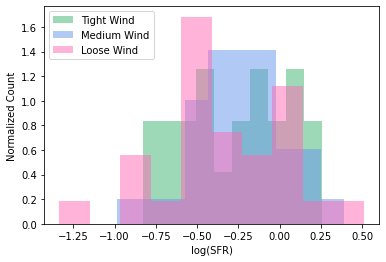

In [25]:
#histogram of SFR values for all galaxies in three arm winding level samples
plt.hist(tight_low['log_SFR_Ha'], color = 'mediumseagreen', alpha = 0.5, label = 'Tight Wind', density = True)
plt.hist(medium_low['log_SFR_Ha'], color = 'cornflowerblue', alpha = 0.5, label = 'Medium Wind', density = True)
plt.hist(loose_low['log_SFR_Ha'], color = 'hotpink', alpha = 0.5, label = 'Loose Wind', density = True)

plt.xlabel('log(SFR)')
plt.ylabel('Normalized Count')
plt.legend(loc = 'upper left')

low_SFR_name = 'Plots/lowmass_SFR_hist.pdf'
plt.savefig(low_SFR_name, bbox_inches='tight')

In [27]:
#calculating sSFR for all galaxies in these three samples
loose_low_ssfr = loose_low['log_SFR_Ha']- loose_low['mass']
tight_low_ssfr = tight_low['log_SFR_Ha']- tight_low['mass_1']
medium_low_ssfr = medium_low['log_SFR_Ha']- medium_low['mass']

406
308


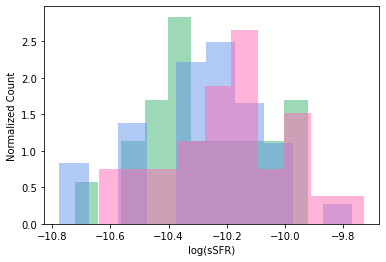

In [28]:
#plotting sSFR histogram for all galaxies in each of the three arm winding level samples
plt.hist(tight_low_ssfr, color = 'mediumseagreen', alpha = 0.5, label = 'Tight Galaxy Sample', density = True)
plt.hist(medium_low_ssfr, color = 'cornflowerblue', alpha = 0.5, label = 'Medium Galaxy Sample', density = True)
plt.hist(loose_low_ssfr, color = 'hotpink', alpha = 0.5, label = 'Loose Galaxy Sample', density = True)

plt.xlabel('log(sSFR)')
plt.ylabel('Normalized Count')
#plt.legend(bbox_to_anchor=(1.04, 1))

low_sSFR_name = 'Plots/lowmass_sSFR_hist.pdf'
plt.savefig(low_sSFR_name, bbox_inches='tight')

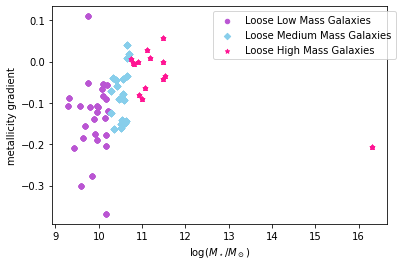

In [29]:
#scatter for all galaxies in the loose arm winding sample
#color based on mass
#plot shows mass vs gradient of binned statistic trend fit to each galaxy 
plt.scatter(loose_low['mass'], loose_low['slope'], color = 'mediumorchid', s = 20, marker = 'o', label = "Loose Low Mass Galaxies")
plt.scatter(loose_mid['mass'], loose_mid['slope'], color = 'skyblue', s = 20, marker = 'D', label = 'Loose Medium Mass Galaxies')
plt.scatter(loose_high['mass'], loose_high['slope'], color = 'deeppink', s = 20, marker = '*', label = 'Loose High Mass Galaxies')
plt.legend(bbox_to_anchor=(1.04, 1))
plt.xlabel(r'$\log (M_\star/M_\odot)$')
plt.ylabel('metallicity gradient')

low_regvsmass_name = 'Plots/lowmass_reg_mass.pdf'
plt.savefig(low_regvsmass_name, bbox_inches='tight')

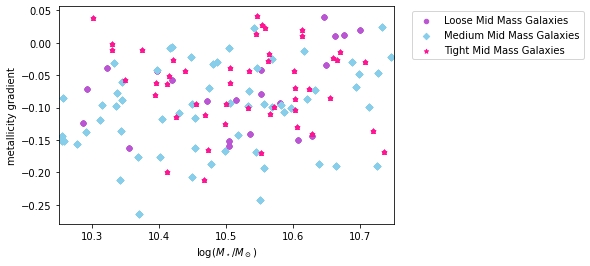

In [30]:
#same as above but for all medium mass galaxies in each of the three arm winding level samples
plt.scatter(loose_mid['mass'], loose_mid['slope'], color = 'mediumorchid', s = 20, marker = 'o', label = "Loose Mid Mass Galaxies")
plt.scatter(medium_mid['mass'], medium_mid['slope'], color = 'skyblue', s = 20, marker = 'D', label = 'Medium Mid Mass Galaxies')
plt.scatter(tight_mid['mass_1'], tight_mid['slope'], color = 'deeppink', s = 20, marker = '*', label = 'Tight Mid Mass Galaxies')
plt.legend(bbox_to_anchor=(1.04, 1))
plt.xlabel(r'$\log (M_\star/M_\odot)$')
plt.ylabel('metallicity gradient')
plt.xlim(10.25,10.75)


mid_regvsmass_name = 'Plots/midmass_reg_mass.pdf'
plt.savefig(mid_regvsmass_name, bbox_inches='tight')

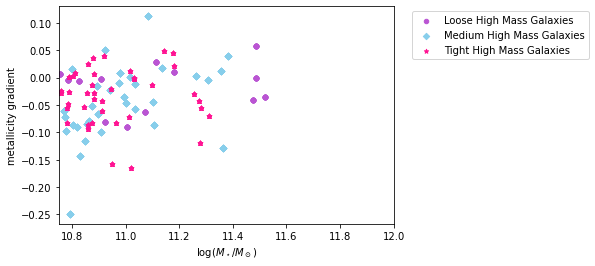

In [31]:
#same as above but for high mass galaxy samples
plt.scatter(loose_high['mass'], loose_high['slope'], color = 'mediumorchid', s = 20, marker = 'o', label = "Loose High Mass Galaxies")
plt.scatter(medium_high['mass'], medium_high['slope'], color = 'skyblue', s = 20, marker = 'D', label = 'Medium High Mass Galaxies')
plt.scatter(tight_high['mass_1'], tight_high['slope'], color = 'deeppink', s = 20, marker = '*', label = 'Tight High Mass Galaxies')
plt.legend(bbox_to_anchor=(1.04, 1))
plt.xlabel(r'$\log (M_\star/M_\odot)$')
plt.ylabel('metallicity gradient')
plt.xlim(10.75,12)


high_regvsmass_name = 'Plots/highmass_reg_mass.pdf'
plt.savefig(high_regvsmass_name, bbox_inches='tight')

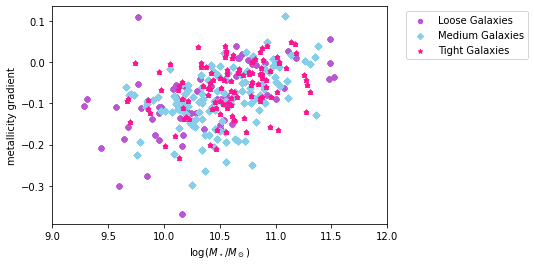

In [32]:
#same as above but for all galaxies in three arm winding level samples
#no mass separation here
plt.scatter(loosegrad_radiuscut['mass'], loosegrad_radiuscut['slope'], color = 'mediumorchid', s = 20, marker = 'o', label = "Loose Galaxies")
plt.scatter(mediumgrad_radiuscut['mass'], mediumgrad_radiuscut['slope'], color = 'skyblue', s = 20, marker = 'D', label = 'Medium Galaxies')
plt.scatter(tightgrad_radiuscut['mass_1'], tightgrad_radiuscut['slope'], color = 'deeppink', s = 20, marker = '*', label = 'Tight Galaxies')
plt.legend(bbox_to_anchor=(1.04, 1))
plt.xlabel(r'$\log (M_\star/M_\odot)$')
plt.ylabel('metallicity gradient')
plt.xlim(9,12)


regvsmass_name = 'Plots/regression_mass.pdf'
plt.savefig(regvsmass_name, bbox_inches='tight')

In [33]:
#reading in files that just have linear regression fit data, mass, and SFR values for each galaxy
tight_regress_mass = fits.open("tight_regress_mass_SFR.fits")
tight_regress_mass = tight_regress_mass[1].data

medium_regress_mass = fits.open("medium_regress_mass_SFR.fits")
medium_regress_mass = medium_regress_mass[1].data

loose_regress_mass = fits.open("loose_regress_mass_SFR.fits")
loose_regress_mass = loose_regress_mass[1].data

#cutting out very low and very high mass galaxies that might skew data
#cutting out very low and very high SFR values that might skew data
#since we are aiming for population trends here, this is okay 
tight_mass_cut = tight_regress_mass[(tight_regress_mass['mass_2'] > 9.5) & (tight_regress_mass['mass_2'] < 11.5)]
tight_mass_SFR_cut = tight_mass_cut[(tight_mass_cut['log_SFR_Ha'] > -1) & (tight_mass_cut['log_SFR_Ha'] < 1.5)]

#saving data into lists and cutting out nan values
tight_slope = tight_mass_SFR_cut['slope']
tight_offset = tight_mass_SFR_cut['intercept']
tight_mass = tight_mass_SFR_cut['mass_2']
tight_SFR = tight_mass_SFR_cut['log_SFR_Ha']
tight_mass = tight_mass[np.logical_not(np.isnan(tight_slope))]
tight_slope = tight_slope[np.logical_not(np.isnan(tight_slope))]
tight_offset = tight_offset[np.logical_not(np.isnan(tight_slope))]
tight_SFR = tight_SFR[np.logical_not(np.isnan(tight_slope))]


medium_mass_cut = medium_regress_mass[(medium_regress_mass['mass_1'] > 9.5) & (medium_regress_mass['mass_1'] < 11.5)]
medium_mass_SFR_cut = medium_mass_cut[(medium_mass_cut['log_SFR_Ha'] > -1) & (medium_mass_cut['log_SFR_Ha'] < 1.5)]


medium_slope = medium_mass_SFR_cut['slope']
medium_offset = medium_mass_SFR_cut['intercept']
medium_mass = medium_mass_SFR_cut['mass_1']
medium_SFR = medium_mass_SFR_cut['log_SFR_Ha']
medium_mass = medium_mass[np.logical_not(np.isnan(medium_slope))]
medium_SFR = medium_SFR[np.logical_not(np.isnan(medium_slope))]
medium_offset = medium_offset[np.logical_not(np.isnan(medium_slope))]
medium_slope = medium_slope[np.logical_not(np.isnan(medium_slope))]


loose_mass_cut = loose_regress_mass[(loose_regress_mass['mass_1'] > 9.5) & (loose_regress_mass['mass_1'] < 11.5)]
loose_mass_SFR_cut = loose_mass_cut[(loose_mass_cut['log_SFR_Ha'] > -1) & (loose_mass_cut['log_SFR_Ha'] < 1.5)]

loose_slope = loose_mass_SFR_cut['slope']
loose_offset = loose_mass_SFR_cut['intercept']
loose_mass = loose_mass_SFR_cut['mass_1']
loose_SFR = loose_mass_SFR_cut['log_SFR_Ha']
loose_mass = loose_mass[np.logical_not(np.isnan(loose_slope))]
loose_SFR = loose_SFR[np.logical_not(np.isnan(loose_slope))]
loose_offset = loose_offset[np.logical_not(np.isnan(loose_slope))]
loose_slope = loose_slope[np.logical_not(np.isnan(loose_slope))]

110
110
110
110
130
130
130
130
57
57
57
57


In [34]:
#running a linear regression fit to the mass vs gradient of linear regression fit to each individual galaxy
#fit of a fit... don't let it confuse you for too long
loose_fit_fit = sci.linregress(loose_mass,loose_slope)
medium_fit_fit = sci.linregress(medium_mass,medium_slope)
tight_fit_fit = sci.linregress(tight_mass,tight_slope)

0.09610749936032657
0.0735104337148929


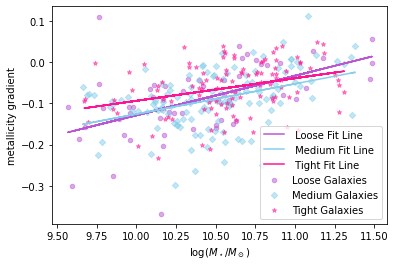

In [35]:
#scatter shows the mass vs gradient for all galaxies in each of the three samples
#linear regression fit to each of those samples plotted over top
plt.scatter(loose_mass, loose_slope, color = 'mediumorchid', s = 20, marker = 'o', label = "Loose Galaxies", alpha = 0.5)
plt.scatter(medium_mass, medium_slope, color = 'skyblue', s = 20, marker = 'D', label = 'Medium Galaxies', alpha = 0.5)
plt.scatter(tight_mass, tight_slope, color = 'deeppink', s = 20, marker = '*', label = 'Tight Galaxies', alpha = 0.5)

plt.plot(loose_mass, loose_fit_fit.intercept + loose_fit_fit.slope*loose_mass, color ='mediumorchid', label=' Loose Fit Line')
plt.plot(medium_mass, medium_fit_fit.intercept + medium_fit_fit.slope*medium_mass, color ='skyblue', label=' Medium Fit Line')
plt.plot(tight_mass, tight_fit_fit.intercept + tight_fit_fit.slope*tight_mass, color ='deeppink', label=' Tight Fit Line')

plt.legend()#bbox_to_anchor=(1.04, 1))
plt.xlabel(r'$\log (M_\star/M_\odot)$')
plt.ylabel('metallicity gradient')
#plt.xlim(9,12)

regvsmass_fit_name = 'Plots/regression_mass_fit_masscut.pdf'
plt.savefig(regvsmass_fit_name, bbox_inches='tight')

Since the straight lines are close together and overlapping at points, this shows a null result as the trend for each arm winding sample do not differ much between arm winding levels. 

Now we do the same thing we just did but with SFR on the x-axis instead of mass. We will also do the same thing for sSFR. These tests will help us to figure out if the null result is driven by any of these factors that we can test. 


In [36]:
loose_fit_fit_SFR = sci.linregress(loose_SFR, loose_slope)
medium_fit_fit_SFR = sci.linregress(medium_SFR, medium_slope)
tight_fit_fit_SFR = sci.linregress(tight_SFR, tight_slope)

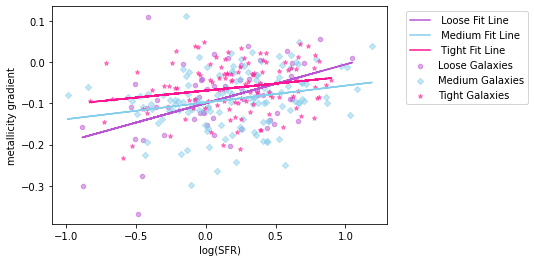

In [37]:
plt.scatter(loose_SFR, loose_slope, color = 'mediumorchid', s = 20, marker = 'o', label = "Loose Galaxies", alpha = 0.5)
plt.scatter(medium_SFR, medium_slope, color = 'skyblue', s = 20, marker = 'D', label = 'Medium Galaxies', alpha = 0.5)
plt.scatter(tight_SFR, tight_slope, color = 'deeppink', s = 20, marker = '*', label = 'Tight Galaxies', alpha = 0.5)

plt.plot(loose_SFR, loose_fit_fit_SFR.intercept + loose_fit_fit_SFR.slope*loose_SFR, color ='mediumorchid', label=' Loose Fit Line')
plt.plot(medium_SFR, medium_fit_fit_SFR.intercept + medium_fit_fit_SFR.slope*medium_SFR, color ='skyblue', label=' Medium Fit Line')
plt.plot(tight_SFR, tight_fit_fit_SFR.intercept + tight_fit_fit_SFR.slope*tight_SFR, color ='deeppink', label=' Tight Fit Line')

plt.legend(bbox_to_anchor=(1.04, 1))
plt.xlabel('log(SFR)')
plt.ylabel('metallicity gradient')
#plt.xlim(9,12)

regvsSFR_fit_name = 'Plots/regression_SFR_fit_masscut.pdf'
plt.savefig(regvsSFR_fit_name, bbox_inches='tight')


In [38]:
loose_sSFR = loose_SFR- loose_mass
tight_sSFR = tight_SFR- tight_mass
medium_sSFR = medium_SFR- medium_mass

In [39]:
loose_fit_fit_sSFR = sci.linregress(loose_sSFR, loose_slope)
medium_fit_fit_sSFR = sci.linregress(medium_sSFR, medium_slope)
tight_fit_fit_sSFR = sci.linregress(tight_sSFR, tight_slope)

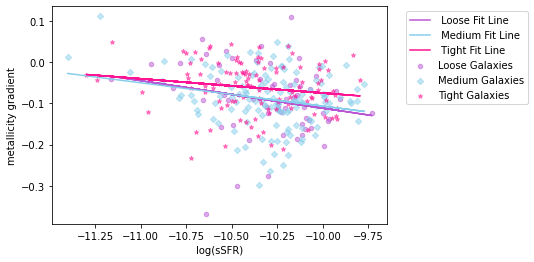

In [40]:
plt.scatter(loose_sSFR, loose_slope, color = 'mediumorchid', s = 20, marker = 'o', label = "Loose Galaxies", alpha = 0.5)
plt.scatter(medium_sSFR, medium_slope, color = 'skyblue', s = 20, marker = 'D', label = 'Medium Galaxies', alpha = 0.5)
plt.scatter(tight_sSFR, tight_slope, color = 'deeppink', s = 20, marker = '*', label = 'Tight Galaxies', alpha = 0.5)

plt.plot(loose_sSFR, loose_fit_fit_sSFR.intercept + loose_fit_fit_sSFR.slope*loose_sSFR, color ='mediumorchid', label=' Loose Fit Line')
plt.plot(medium_sSFR, medium_fit_fit_sSFR.intercept + medium_fit_fit_sSFR.slope*medium_sSFR, color ='skyblue', label=' Medium Fit Line')
plt.plot(tight_sSFR, tight_fit_fit_sSFR.intercept + tight_fit_fit_sSFR.slope*tight_sSFR, color ='deeppink', label=' Tight Fit Line')

plt.legend(bbox_to_anchor=(1.04, 1))
plt.xlabel('log(sSFR)')
plt.ylabel('metallicity gradient')
#plt.xlim(9,12)

regvssSFR_fit_name = 'Plots/regression_sSFR_fit_masscut.pdf'
plt.savefig(regvssSFR_fit_name, bbox_inches='tight')


0.13680584696414932
0.1432285280294492
5.103047255823767


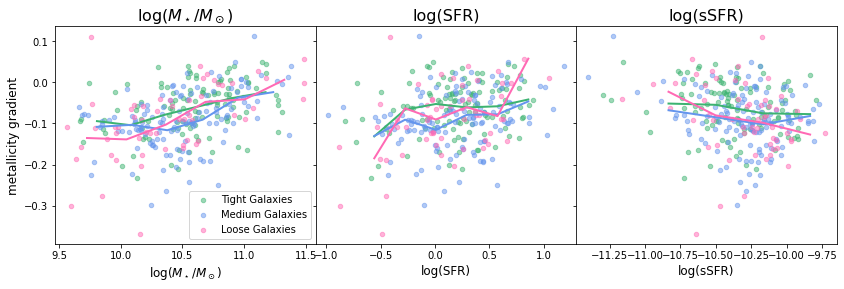

In [41]:
#plotting all 3 previous figures together 
#Make a figure
fig1=plt.figure()
fig1.set_size_inches(14,4)
fig1.subplots_adjust(wspace=0, hspace=0)

nhigh = 1
nwide = 3

mass=fig1.add_subplot(nhigh, nwide, 1)
SFR=fig1.add_subplot(nhigh, nwide, 2, sharey=mass)
sSFR=fig1.add_subplot(nhigh, nwide, 3, sharey = mass)

mass.set_title(r'$\log (M_\star/M_\odot)$', size=16)
SFR.set_title('log(SFR)', size=16)
sSFR.set_title('log(sSFR)', size=16)

for tick in mass.yaxis.get_major_ticks():
    tick.label1.set_visible(True) 
    tick.label2.set_visible(False)
for tick in SFR.yaxis.get_major_ticks():
    tick.label1.set_visible(False) 
    tick.label2.set_visible(False)
for tick in sSFR.yaxis.get_major_ticks():
    tick.label1.set_visible(False) 
    tick.label2.set_visible(False)
    
mass.set_ylabel("metallicity gradient", size=12)
mass.set_xlabel(r'$\log (M_\star/M_\odot)$', size=12)
SFR.set_xlabel('log(SFR)', size=12)
sSFR.set_xlabel('log(sSFR)', size=12)

#mass

mass.scatter(tight_mass, tight_slope, color = 'mediumseagreen', s = 20,  label = 'Tight Galaxies', alpha = 0.5)
tight_slope_mean,tight_mass_mean,binnumber = sci.binned_statistic(tight_mass,tight_slope,bins=6)
print((tight_mass_mean[1]-tight_mass_mean[0])/2)
mass.scatter(medium_mass, medium_slope, color = 'cornflowerblue', s = 20,  label = 'Medium Galaxies', alpha = 0.5)
medium_slope_mean,medium_mass_mean,binnumber = sci.binned_statistic(medium_mass,medium_slope,bins=6)
print((medium_mass_mean[1]-medium_mass_mean[0])/2)
mass.scatter(loose_mass, loose_slope, color = 'hotpink', s = 20, label = "Loose Galaxies", alpha = 0.5)
loose_slope_mean,loose_mass_mean,binnumber = sci.binned_statistic(loose_mass,loose_slope,bins=6)
print(loose_mass_mean[1]-loose_mass_mean[0]/2)

mass.plot((tight_mass_mean[:-1]+((tight_mass_mean[1]-tight_mass_mean[0])/2)), tight_slope_mean,  color ='mediumseagreen',  linewidth = 2)
mass.plot((medium_mass_mean[:-1]+((medium_mass_mean[1]-medium_mass_mean[0])/2)), medium_slope_mean,  color ='cornflowerblue',  linewidth = 2)
mass.plot((loose_mass_mean[:-1]+((loose_mass_mean[1]-loose_mass_mean[0])/2)), loose_slope_mean,  color ='hotpink',  linewidth = 2)

# mass.plot(loose_mass, loose_fit_fit.intercept + loose_fit_fit.slope*loose_mass, color ='hotpink', label=' Loose Fit Line')
# mass.plot(medium_mass, medium_fit_fit.intercept + medium_fit_fit.slope*medium_mass, color ='cornflowerblue', label=' Medium Fit Line')
# mass.plot(tight_mass, tight_fit_fit.intercept + tight_fit_fit.slope*tight_mass, color ='mediumseagreen', label=' Tight Fit Line')

#SFR
SFR.scatter(tight_SFR, tight_slope, color = 'mediumseagreen', s = 20, label = 'Tight Galaxies', alpha = 0.5)
tight_slope_mean,tight_SFR_mean,binnumber = sci.binned_statistic(tight_SFR,tight_slope,bins=6, range = [-0.7,1])
SFR.scatter(medium_SFR, medium_slope, color = 'cornflowerblue', s = 20,  label = 'Medium Galaxies', alpha = 0.5)
medium_slope_mean,medium_SFR_mean,binnumber = sci.binned_statistic(medium_SFR,medium_slope,bins=6, range = [-0.7,1])
SFR.scatter(loose_SFR, loose_slope, color = 'hotpink', s = 20,  label = "Loose Galaxies", alpha = 0.5)
loose_slope_mean,loose_SFR_mean,binnumber = sci.binned_statistic(loose_SFR,loose_slope,bins=6, range = [-0.7,1])

SFR.plot((tight_SFR_mean[:-1]+((tight_SFR_mean[1]-tight_SFR_mean[0])/2)), tight_slope_mean,  color ='mediumseagreen', label=' Tight Fit Line', linewidth = 2)
SFR.plot((medium_SFR_mean[:-1]+((medium_SFR_mean[1]-medium_SFR_mean[0])/2)), medium_slope_mean,  color ='cornflowerblue', label=' Medium Fit Line', linewidth = 2)
SFR.plot((loose_SFR_mean[:-1]+((loose_SFR_mean[1]-loose_SFR_mean[0])/2)), loose_slope_mean,  color ='hotpink', label=' Loose Fit Line', linewidth = 2)

# SFR.plot(loose_SFR, loose_fit_fit_SFR.intercept + loose_fit_fit_SFR.slope*loose_SFR, color ='hotpink', label=' Loose Fit Line')
# SFR.plot(medium_SFR, medium_fit_fit_SFR.intercept + medium_fit_fit_SFR.slope*medium_SFR, color ='cornflowerblue', label=' Medium Fit Line')
# SFR.plot(tight_SFR, tight_fit_fit_SFR.intercept + tight_fit_fit_SFR.slope*tight_SFR, color ='mediumseagreen', label=' Tight Fit Line')

#sSFR

sSFR.scatter(tight_sSFR, tight_slope, color = 'mediumseagreen', s = 20,  label = 'Tight Galaxies', alpha = 0.5)
tight_slope_mean,tight_sSFR_mean,binnumber = sci.binned_statistic(tight_sSFR,tight_slope,bins=6, range = [-11,-9])
sSFR.scatter(medium_sSFR, medium_slope, color = 'cornflowerblue', s = 20, label = 'Medium Galaxies', alpha = 0.5)
medium_slope_mean,medium_sSFR_mean,binnumber = sci.binned_statistic(medium_sSFR,medium_slope,bins=6, range = [-11,-9])
sSFR.scatter(loose_sSFR, loose_slope, color = 'hotpink', s = 20, label = "Loose Galaxies", alpha = 0.5)
loose_slope_mean,loose_sSFR_mean,binnumber = sci.binned_statistic(loose_sSFR,loose_slope,bins=6, range = [-11,-9])

sSFR.plot((tight_sSFR_mean[:-1]+((tight_sSFR_mean[1]-tight_sSFR_mean[0])/2)), tight_slope_mean,  color ='mediumseagreen', label=' Tight Fit Line', linewidth = 2)
sSFR.plot((medium_sSFR_mean[:-1]+((medium_sSFR_mean[1]-medium_sSFR_mean[0])/2)), medium_slope_mean,  color ='cornflowerblue', label=' Medium Fit Line', linewidth = 2)
sSFR.plot((loose_sSFR_mean[:-1]+((loose_sSFR_mean[1]-loose_sSFR_mean[0])/2)), loose_slope_mean,  color ='hotpink', label=' Loose Fit Line', linewidth = 2)


# sSFR.plot(loose_sSFR, loose_fit_fit_sSFR.intercept + loose_fit_fit_sSFR.slope*loose_sSFR, color ='hotpink', label=' Loose Fit Line')
# sSFR.plot(medium_sSFR, medium_fit_fit_sSFR.intercept + medium_fit_fit_sSFR.slope*medium_sSFR, color ='cornflowerblue', label=' Medium Fit Line')
# sSFR.plot(tight_sSFR, tight_fit_fit_sSFR.intercept + tight_fit_fit_sSFR.slope*tight_sSFR, color ='mediumseagreen', label=' Tight Fit Line')

mass.legend(loc = 'lower right')

panel_regressions_name = 'Plots/panel_regressions_gradients.pdf'
plt.savefig(panel_regressions_name, bbox_inches='tight')

Now instead of the gradients on the y-axis, we are going to make the same plot but with the offset on the y-axis. Again, this further shows us that these factors are not motivators for the null result that we are seeing. 

0.13680584696414932
0.1432285280294492
5.103047255823767


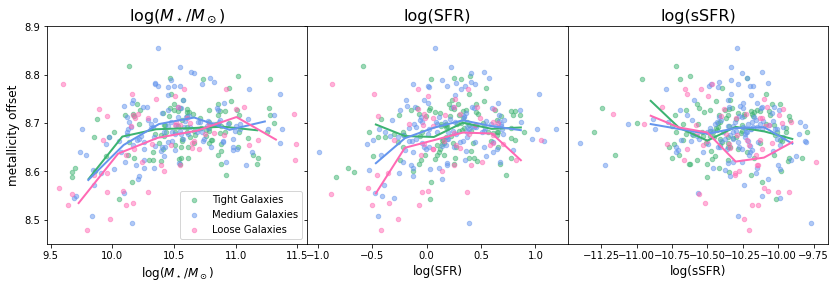

In [42]:
#plotting all 3 previous figures together but for offset
#Make a figure
fig1=plt.figure()
fig1.set_size_inches(14,4)
fig1.subplots_adjust(wspace=0, hspace=0)

nhigh = 1
nwide = 3

mass=fig1.add_subplot(nhigh, nwide, 1)
SFR=fig1.add_subplot(nhigh, nwide, 2, sharey=mass)
sSFR=fig1.add_subplot(nhigh, nwide, 3, sharey = mass)

mass.set_title(r'$\log (M_\star/M_\odot)$', size=16)
SFR.set_title('log(SFR)', size=16)
sSFR.set_title('log(sSFR)', size=16)
mass.set_ylim(8.45,8.9)

for tick in mass.yaxis.get_major_ticks():
    tick.label1.set_visible(True) 
    tick.label2.set_visible(False)
for tick in SFR.yaxis.get_major_ticks():
    tick.label1.set_visible(False) 
    tick.label2.set_visible(False)
for tick in sSFR.yaxis.get_major_ticks():
    tick.label1.set_visible(False) 
    tick.label2.set_visible(False)
    
mass.set_ylabel("metallicity offset", size=12)
mass.set_xlabel(r'$\log (M_\star/M_\odot)$', size=12)
SFR.set_xlabel('log(SFR)', size=12)
sSFR.set_xlabel('log(sSFR)', size=12)

#mass

mass.scatter(tight_mass, tight_offset, color = 'mediumseagreen', s = 20,  label = 'Tight Galaxies', alpha = 0.5)
tight_offset_mean,tight_mass_mean,binnumber = sci.binned_statistic(tight_mass,tight_offset,bins=6)
print((tight_mass_mean[1]-tight_mass_mean[0])/2)
mass.scatter(medium_mass, medium_offset, color = 'cornflowerblue', s = 20,  label = 'Medium Galaxies', alpha = 0.5)
medium_offset_mean,medium_mass_mean,binnumber = sci.binned_statistic(medium_mass,medium_offset,bins=6)
print((medium_mass_mean[1]-medium_mass_mean[0])/2)
mass.scatter(loose_mass, loose_offset, color = 'hotpink', s = 20, label = "Loose Galaxies", alpha = 0.5)
loose_offset_mean,loose_mass_mean,binnumber = sci.binned_statistic(loose_mass,loose_offset,bins=6)
print(loose_mass_mean[1]-loose_mass_mean[0]/2)

mass.plot((tight_mass_mean[:-1]+((tight_mass_mean[1]-tight_mass_mean[0])/2)), tight_offset_mean,  color ='mediumseagreen', linewidth = 2)
mass.plot((medium_mass_mean[:-1]+((medium_mass_mean[1]-medium_mass_mean[0])/2)), medium_offset_mean,  color ='cornflowerblue', linewidth = 2)
mass.plot((loose_mass_mean[:-1]+((loose_mass_mean[1]-loose_mass_mean[0])/2)), loose_offset_mean,  color ='hotpink',  linewidth = 2)

mass.legend(loc = 'lower right')
# mass.plot(loose_mass, loose_fit_fit.intercept + loose_fit_fit.offset*loose_mass, color ='hotpink', label=' Loose Fit Line')
# mass.plot(medium_mass, medium_fit_fit.intercept + medium_fit_fit.offset*medium_mass, color ='cornflowerblue', label=' Medium Fit Line')
# mass.plot(tight_mass, tight_fit_fit.intercept + tight_fit_fit.offset*tight_mass, color ='mediumseagreen', label=' Tight Fit Line')

#SFR
SFR.scatter(tight_SFR, tight_offset, color = 'mediumseagreen', s = 20, label = 'Tight Galaxies', alpha = 0.5)
tight_offset_mean,tight_SFR_mean,binnumber = sci.binned_statistic(tight_SFR,tight_offset,bins=6, range = [-0.6, 1])
SFR.scatter(medium_SFR, medium_offset, color = 'cornflowerblue', s = 20,  label = 'Medium Galaxies', alpha = 0.5)
medium_offset_mean,medium_SFR_mean,binnumber = sci.binned_statistic(medium_SFR,medium_offset,bins=6, range = [-0.6,1])
SFR.scatter(loose_SFR, loose_offset, color = 'hotpink', s = 20,  label = "Loose Galaxies", alpha = 0.5)
loose_offset_mean,loose_SFR_mean,binnumber = sci.binned_statistic(loose_SFR,loose_offset,bins=6, range = [-0.6,1])

SFR.plot((tight_SFR_mean[:-1]+((tight_SFR_mean[1]-tight_SFR_mean[0])/2)), tight_offset_mean,  color ='mediumseagreen', label=' Tight Fit Line', linewidth = 2)
SFR.plot((medium_SFR_mean[:-1]+((medium_SFR_mean[1]-medium_SFR_mean[0])/2)), medium_offset_mean,  color ='cornflowerblue', label=' Medium Fit Line', linewidth = 2)
SFR.plot((loose_SFR_mean[:-1]+((loose_SFR_mean[1]-loose_SFR_mean[0])/2)), loose_offset_mean,  color ='hotpink', label=' Loose Fit Line', linewidth = 2)

# SFR.plot(loose_SFR, loose_fit_fit_SFR.intercept + loose_fit_fit_SFR.offset*loose_SFR, color ='hotpink', label=' Loose Fit Line')
# SFR.plot(medium_SFR, medium_fit_fit_SFR.intercept + medium_fit_fit_SFR.offset*medium_SFR, color ='cornflowerblue', label=' Medium Fit Line')
# SFR.plot(tight_SFR, tight_fit_fit_SFR.intercept + tight_fit_fit_SFR.offset*tight_SFR, color ='mediumseagreen', label=' Tight Fit Line')

#sSFR

sSFR.scatter(tight_sSFR, tight_offset, color = 'mediumseagreen', s = 20,  label = 'Tight Galaxies', alpha = 0.5)
tight_offset_mean,tight_sSFR_mean,binnumber = sci.binned_statistic(tight_sSFR,tight_offset,bins=6, range = [-11,-9.8])
sSFR.scatter(medium_sSFR, medium_offset, color = 'cornflowerblue', s = 20, label = 'Medium Galaxies', alpha = 0.5)
medium_offset_mean,medium_sSFR_mean,binnumber = sci.binned_statistic(medium_sSFR,medium_offset,bins=6, range = [-11,-9.8])
sSFR.scatter(loose_sSFR, loose_offset, color = 'hotpink', s = 20, label = "Loose Galaxies", alpha = 0.5)
loose_offset_mean,loose_sSFR_mean,binnumber = sci.binned_statistic(loose_sSFR,loose_offset,bins=6, range = [-11,-9.8])

sSFR.plot((tight_sSFR_mean[:-1]+((tight_sSFR_mean[1]-tight_sSFR_mean[0])/2)), tight_offset_mean,  color ='mediumseagreen', label=' Tight Fit Line', linewidth = 2)
sSFR.plot((medium_sSFR_mean[:-1]+((medium_sSFR_mean[1]-medium_sSFR_mean[0])/2)), medium_offset_mean,  color ='cornflowerblue', label=' Medium Fit Line', linewidth = 2)
sSFR.plot((loose_sSFR_mean[:-1]+((loose_sSFR_mean[1]-loose_sSFR_mean[0])/2)), loose_offset_mean,  color ='hotpink', label=' Loose Fit Line', linewidth = 2)

# sSFR.plot(loose_sSFR, loose_fit_fit_sSFR.intercept + loose_fit_fit_sSFR.offset*loose_sSFR, color ='hotpink', label=' Loose Fit Line')
# sSFR.plot(medium_sSFR, medium_fit_fit_sSFR.intercept + medium_fit_fit_sSFR.offset*medium_sSFR, color ='cornflowerblue', label=' Medium Fit Line')
# sSFR.plot(tight_sSFR, tight_fit_fit_sSFR.intercept + tight_fit_fit_sSFR.offset*tight_sSFR, color ='mediumseagreen', label=' Tight Fit Line')


panel_regressions_name = 'Plots/panel_regressions_offset.pdf'
plt.savefig(panel_regressions_name, bbox_inches='tight')

In [43]:
#still see the same behavior--loose are a little less metal rich at same mass 

0.13680584696414932
0.1432285280294492
5.103047255823767
0.13680584696414932
0.1432285280294492
5.103047255823767


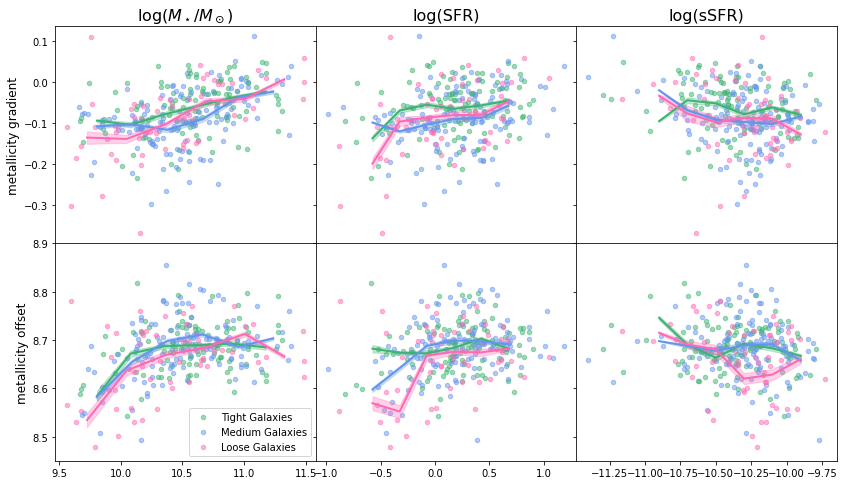

In [48]:
#this just plots the two previous plots together into a massive subplot so it is easier to see all the information together
fig1=plt.figure()
fig1.set_size_inches(14,8)
fig1.subplots_adjust(wspace=0, hspace=0)

nhigh = 2
nwide = 3


grad_mass=fig1.add_subplot(nhigh, nwide, 1)
grad_SFR=fig1.add_subplot(nhigh, nwide, 2, sharey=grad_mass)
grad_sSFR=fig1.add_subplot(nhigh, nwide, 3, sharey = grad_mass)

offset_mass=fig1.add_subplot(nhigh, nwide, 4, sharex = grad_mass)
offset_SFR=fig1.add_subplot(nhigh, nwide, 5, sharey=offset_mass, sharex = grad_SFR)
offset_sSFR=fig1.add_subplot(nhigh, nwide, 6, sharey =offset_mass, sharex = grad_sSFR)


grad_mass.set_title(r'$\log (M_\star/M_\odot)$', size=16)
grad_SFR.set_title('log(SFR)', size=16)
grad_sSFR.set_title('log(sSFR)', size=16)
offset_mass.set_ylim(8.45,8.9)

for tick in grad_mass.yaxis.get_major_ticks():
    tick.label1.set_visible(True) 
    tick.label2.set_visible(False)
for tick in grad_mass.xaxis.get_major_ticks():
    tick.label1.set_visible(False) 
    tick.label2.set_visible(False)
for tick in grad_SFR.yaxis.get_major_ticks():
    tick.label1.set_visible(False) 
    tick.label2.set_visible(False)
for tick in grad_sSFR.yaxis.get_major_ticks():
    tick.label1.set_visible(False) 
    tick.label2.set_visible(False)
    
for tick in offset_mass.yaxis.get_major_ticks():
    tick.label1.set_visible(True) 
    tick.label2.set_visible(False)
for tick in offset_SFR.yaxis.get_major_ticks():
    tick.label1.set_visible(False) 
    tick.label2.set_visible(False)
for tick in offset_sSFR.yaxis.get_major_ticks():
    tick.label1.set_visible(False) 
    tick.label2.set_visible(False)
    
offset_mass.set_ylabel("metallicity offset", size=12)
grad_mass.set_ylabel("metallicity gradient", size = 12)
grad_mass.set_xlabel(r'$\log (M_\star/M_\odot)$', size=12)
grad_SFR.set_xlabel('log(SFR)', size=12)
grad_sSFR.set_xlabel('log(sSFR)', size=12)

#mass

grad_mass.scatter(tight_mass, tight_slope, color = 'mediumseagreen', s = 20,  label = 'Tight Galaxies', alpha = 0.5)
tight_slope_mean,tight_mass_mean,binnumber = sci.binned_statistic(tight_mass,tight_slope,bins=6)
tight_slope_std,tight_mass_mean,binnumber = sci.binned_statistic(tight_mass,tight_slope,bins =6, statistic = 'std')
print((tight_mass_mean[1]-tight_mass_mean[0])/2)

grad_mass.scatter(medium_mass, medium_slope, color = 'cornflowerblue', s = 20,  label = 'Medium Galaxies', alpha = 0.5)
medium_slope_mean,medium_mass_mean,binnumber = sci.binned_statistic(medium_mass,medium_slope,bins=6)
medium_slope_std,medium_mass_mean,binnumber = sci.binned_statistic(medium_mass,medium_slope,bins =6, statistic = 'std')
print((medium_mass_mean[1]-medium_mass_mean[0])/2)

grad_mass.scatter(loose_mass, loose_slope, color = 'hotpink', s = 20, label = "Loose Galaxies", alpha = 0.5)
loose_slope_mean,loose_mass_mean,binnumber = sci.binned_statistic(loose_mass,loose_slope,bins=6)
loose_slope_std,loose_mass_mean,binnumber = sci.binned_statistic(loose_mass,loose_slope,bins =6, statistic = 'std')
print(loose_mass_mean[1]-loose_mass_mean[0]/2)

grad_mass.plot((tight_mass_mean[:-1]+((tight_mass_mean[1]-tight_mass_mean[0])/2)), tight_slope_mean,  color ='mediumseagreen',  linewidth = 2)
grad_mass.fill_between((tight_mass_mean[:-1]+((tight_mass_mean[1]-tight_mass_mean[0])/2)),tight_slope_mean - (tight_slope_std/math.sqrt(112)), tight_slope_mean + (tight_slope_std/math.sqrt(112)), alpha = 0.3, color = 'mediumseagreen')
grad_mass.plot((medium_mass_mean[:-1]+((medium_mass_mean[1]-medium_mass_mean[0])/2)), medium_slope_mean,  color ='cornflowerblue',  linewidth = 2)
grad_mass.fill_between((medium_mass_mean[:-1]+((medium_mass_mean[1]-medium_mass_mean[0])/2)),medium_slope_mean - (medium_slope_std/math.sqrt(135)), medium_slope_mean + (medium_slope_std/math.sqrt(135)), alpha = 0.3, color = 'cornflowerblue')
grad_mass.plot((loose_mass_mean[:-1]+((loose_mass_mean[1]-loose_mass_mean[0])/2)), loose_slope_mean,  color ='hotpink',  linewidth = 2)
grad_mass.fill_between((loose_mass_mean[:-1]+((loose_mass_mean[1]-loose_mass_mean[0])/2)),loose_slope_mean - (loose_slope_std/math.sqrt(64)), loose_slope_mean + (loose_slope_std/math.sqrt(64)), alpha = 0.3, color = 'hotpink')

#SFR

grad_SFR.scatter(tight_SFR, tight_slope, color = 'mediumseagreen', s = 20, label = 'Tight Galaxies', alpha = 0.5)
tight_slope_mean,tight_SFR_mean,binnumber = sci.binned_statistic(tight_SFR,tight_slope,bins=6, range = [-0.7,0.8])
tight_slope_std,tight_SFR_mean,binnumber = sci.binned_statistic(tight_SFR,tight_slope,bins =6, statistic = 'std', range = [-0.7,0.8])
grad_SFR.scatter(medium_SFR, medium_slope, color = 'cornflowerblue', s = 20,  label = 'Medium Galaxies', alpha = 0.5)
medium_slope_mean,medium_SFR_mean,binnumber = sci.binned_statistic(medium_SFR,medium_slope,bins=6, range = [-0.7,0.8])
medium_slope_std,medium_SFR_mean,binnumber = sci.binned_statistic(medium_SFR,medium_slope,bins =6, statistic = 'std', range = [-0.7,0.8])
grad_SFR.scatter(loose_SFR, loose_slope, color = 'hotpink', s = 20,  label = "Loose Galaxies", alpha = 0.5)
loose_slope_mean,loose_SFR_mean,binnumber = sci.binned_statistic(loose_SFR,loose_slope,bins=6, range = [-0.7,0.8])
loose_slope_std,loose_SFR_mean,binnumber = sci.binned_statistic(loose_SFR,loose_slope,bins =6, statistic = 'std', range = [-0.7,0.8])

grad_SFR.plot((tight_SFR_mean[:-1]+((tight_SFR_mean[1]-tight_SFR_mean[0])/2)), tight_slope_mean,  color ='mediumseagreen', label=' Tight Fit Line', linewidth = 2)
grad_SFR.fill_between((tight_SFR_mean[:-1]+((tight_SFR_mean[1]-tight_SFR_mean[0])/2)),tight_slope_mean - (tight_slope_std/math.sqrt(112)), tight_slope_mean + (tight_slope_std/math.sqrt(112)), alpha = 0.3, color = 'mediumseagreen')
grad_SFR.plot((medium_SFR_mean[:-1]+((medium_SFR_mean[1]-medium_SFR_mean[0])/2)), medium_slope_mean,  color ='cornflowerblue', label=' Medium Fit Line', linewidth = 2)
grad_SFR.fill_between((medium_SFR_mean[:-1]+((medium_SFR_mean[1]-medium_SFR_mean[0])/2)),medium_slope_mean - (medium_slope_std/math.sqrt(135)), medium_slope_mean + (medium_slope_std/math.sqrt(135)), alpha = 0.3, color = 'cornflowerblue')
grad_SFR.plot((loose_SFR_mean[:-1]+((loose_SFR_mean[1]-loose_SFR_mean[0])/2)), loose_slope_mean,  color ='hotpink', label=' Loose Fit Line', linewidth = 2)
grad_SFR.fill_between((loose_SFR_mean[:-1]+((loose_SFR_mean[1]-loose_SFR_mean[0])/2)),loose_slope_mean - (loose_slope_std/math.sqrt(64)), loose_slope_mean + (loose_slope_std/math.sqrt(64)), alpha = 0.3, color = 'hotpink')

#sSFR

grad_sSFR.scatter(tight_sSFR, tight_slope, color = 'mediumseagreen', s = 20,  label = 'Tight Galaxies', alpha = 0.5)
tight_slope_mean,tight_sSFR_mean,binnumber = sci.binned_statistic(tight_sSFR,tight_slope,bins=6, range = [-11,-9.8])
tight_slope_std,tight_sSFR_mean,binnumber = sci.binned_statistic(tight_sSFR,tight_slope,bins =6, statistic = 'std', range = [-11,-9.8])
grad_sSFR.scatter(medium_sSFR, medium_slope, color = 'cornflowerblue', s = 20, label = 'Medium Galaxies', alpha = 0.5)
medium_slope_mean,medium_sSFR_mean,binnumber = sci.binned_statistic(medium_sSFR,medium_slope,bins=6, range = [-11,-9.8])
medium_slope_std,medium_sSFR_mean,binnumber = sci.binned_statistic(medium_sSFR,medium_slope,bins =6, statistic = 'std', range = [-11,-9.8])
grad_sSFR.scatter(loose_sSFR, loose_slope, color = 'hotpink', s = 20, label = "Loose Galaxies", alpha = 0.5)
loose_slope_mean,loose_sSFR_mean,binnumber = sci.binned_statistic(loose_sSFR,loose_slope,bins=6, range = [-11,-9.8])
loose_slope_std,loose_sSFR_mean,binnumber = sci.binned_statistic(loose_sSFR,loose_slope,bins =6, statistic = 'std', range = [-11,-9.8])


grad_sSFR.plot((tight_sSFR_mean[:-1]+((tight_sSFR_mean[1]-tight_sSFR_mean[0])/2)), tight_slope_mean,  color ='mediumseagreen', label=' Tight Fit Line', linewidth = 2)
grad_sSFR.fill_between((tight_sSFR_mean[:-1]+((tight_sSFR_mean[1]-tight_sSFR_mean[0])/2)),tight_slope_mean - (tight_slope_std/math.sqrt(112)), tight_slope_mean + (tight_slope_std/math.sqrt(112)), alpha = 0.3, color = 'mediumseagreen')
grad_sSFR.plot((medium_sSFR_mean[:-1]+((medium_sSFR_mean[1]-medium_sSFR_mean[0])/2)), medium_slope_mean,  color ='cornflowerblue', label=' Medium Fit Line', linewidth = 2)
grad_sSFR.fill_between((medium_sSFR_mean[:-1]+((medium_sSFR_mean[1]-medium_sSFR_mean[0])/2)),medium_slope_mean - (medium_slope_std/math.sqrt(135)), medium_slope_mean + (medium_slope_std/math.sqrt(135)), alpha = 0.3, color = 'cornflowerblue')
grad_sSFR.plot((loose_sSFR_mean[:-1]+((loose_sSFR_mean[1]-loose_sSFR_mean[0])/2)), loose_slope_mean,  color ='hotpink', label=' Loose Fit Line', linewidth = 2)
grad_sSFR.fill_between((loose_sSFR_mean[:-1]+((loose_sSFR_mean[1]-loose_sSFR_mean[0])/2)),loose_slope_mean - (loose_slope_std/math.sqrt(64)), loose_slope_mean + (loose_slope_std/math.sqrt(64)), alpha = 0.3, color = 'hotpink')

#offset
#mass

offset_mass.scatter(tight_mass, tight_offset, color = 'mediumseagreen', s = 20,  label = 'Tight Galaxies', alpha = 0.5)
tight_offset_mean,tight_mass_mean,binnumber = sci.binned_statistic(tight_mass,tight_offset,bins=6)
tight_offset_std,tight_mass_mean,binnumber = sci.binned_statistic(tight_mass,tight_offset,bins =6, statistic = 'std')
print((tight_mass_mean[1]-tight_mass_mean[0])/2)
offset_mass.scatter(medium_mass, medium_offset, color = 'cornflowerblue', s = 20,  label = 'Medium Galaxies', alpha = 0.5)
medium_offset_mean,medium_mass_mean,binnumber = sci.binned_statistic(medium_mass,medium_offset,bins=6)
medium_offset_std,medium_mass_mean,binnumber = sci.binned_statistic(medium_mass,medium_offset,bins =6, statistic = 'std')
print((medium_mass_mean[1]-medium_mass_mean[0])/2)
offset_mass.scatter(loose_mass, loose_offset, color = 'hotpink', s = 20, label = "Loose Galaxies", alpha = 0.5)
loose_offset_mean,loose_mass_mean,binnumber = sci.binned_statistic(loose_mass,loose_offset,bins=6)
loose_offset_std,loose_mass_mean,binnumber = sci.binned_statistic(loose_mass,loose_offset,bins =6, statistic = 'std')
print(loose_mass_mean[1]-loose_mass_mean[0]/2)

offset_mass.plot((tight_mass_mean[:-1]+((tight_mass_mean[1]-tight_mass_mean[0])/2)), tight_offset_mean,  color ='mediumseagreen', linewidth = 2)
offset_mass.fill_between((tight_mass_mean[:-1]+((tight_mass_mean[1]-tight_mass_mean[0])/2)),tight_offset_mean - (tight_offset_std/math.sqrt(112)), tight_offset_mean + (tight_offset_std/math.sqrt(112)), alpha = 0.3, color = 'mediumseagreen')
offset_mass.plot((medium_mass_mean[:-1]+((medium_mass_mean[1]-medium_mass_mean[0])/2)), medium_offset_mean,  color ='cornflowerblue', linewidth = 2)
offset_mass.fill_between((medium_mass_mean[:-1]+((medium_mass_mean[1]-medium_mass_mean[0])/2)),medium_offset_mean - (medium_offset_std/math.sqrt(135)), medium_offset_mean + (medium_offset_std/math.sqrt(135)), alpha = 0.3, color = 'cornflowerblue')
offset_mass.plot((loose_mass_mean[:-1]+((loose_mass_mean[1]-loose_mass_mean[0])/2)), loose_offset_mean,  color ='hotpink',  linewidth = 2)
offset_mass.fill_between((loose_mass_mean[:-1]+((loose_mass_mean[1]-loose_mass_mean[0])/2)),loose_offset_mean - (loose_offset_std/math.sqrt(64)), loose_offset_mean + (loose_offset_std/math.sqrt(64)), alpha = 0.3, color = 'hotpink')

offset_mass.legend(loc = 'lower right')
# mass.plot(loose_mass, loose_fit_fit.intercept + loose_fit_fit.offset*loose_mass, color ='hotpink', label=' Loose Fit Line')
# mass.plot(medium_mass, medium_fit_fit.intercept + medium_fit_fit.offset*medium_mass, color ='cornflowerblue', label=' Medium Fit Line')
# mass.plot(tight_mass, tight_fit_fit.intercept + tight_fit_fit.offset*tight_mass, color ='mediumseagreen', label=' Tight Fit Line')

#SFR
offset_SFR.scatter(tight_SFR, tight_offset, color = 'mediumseagreen', s = 20, label = 'Tight Galaxies', alpha = 0.5)
tight_offset_mean,tight_SFR_mean,binnumber = sci.binned_statistic(tight_SFR,tight_offset,bins=6, range = [-0.7, 0.8])
tight_offset_std,tight_SFR_mean,binnumber = sci.binned_statistic(tight_SFR,tight_offset,bins =6, statistic = 'std', range = [-0.7,0.8])
offset_SFR.scatter(medium_SFR, medium_offset, color = 'cornflowerblue', s = 20,  label = 'Medium Galaxies', alpha = 0.5)
medium_offset_mean,medium_SFR_mean,binnumber = sci.binned_statistic(medium_SFR,medium_offset,bins=6, range = [-0.7,0.8])
medium_offset_std,medium_SFR_mean,binnumber = sci.binned_statistic(medium_SFR,medium_offset,bins =6, statistic = 'std', range = [-0.7,0.8])
offset_SFR.scatter(loose_SFR, loose_offset, color = 'hotpink', s = 20,  label = "Loose Galaxies", alpha = 0.5)
loose_offset_mean,loose_SFR_mean,binnumber = sci.binned_statistic(loose_SFR,loose_offset,bins=6, range = [-0.7,0.8])
loose_offset_std,loose_SFR_mean,binnumber = sci.binned_statistic(loose_SFR,loose_offset,bins =6, statistic = 'std', range = [-0.7,0.8])


offset_SFR.plot((tight_SFR_mean[:-1]+((tight_SFR_mean[1]-tight_SFR_mean[0])/2)), tight_offset_mean,  color ='mediumseagreen', label=' Tight Fit Line', linewidth = 2)
offset_SFR.fill_between((tight_SFR_mean[:-1]+((tight_SFR_mean[1]-tight_SFR_mean[0])/2)),tight_offset_mean - (tight_offset_std/math.sqrt(112)), tight_offset_mean + (tight_offset_std/math.sqrt(112)), alpha = 0.3, color = 'mediumseagreen')
offset_SFR.plot((medium_SFR_mean[:-1]+((medium_SFR_mean[1]-medium_SFR_mean[0])/2)), medium_offset_mean,  color ='cornflowerblue', label=' Medium Fit Line', linewidth = 2)
offset_SFR.fill_between((medium_SFR_mean[:-1]+((medium_SFR_mean[1]-medium_SFR_mean[0])/2)),medium_offset_mean - (medium_offset_std/math.sqrt(135)), medium_offset_mean + (medium_offset_std/math.sqrt(135)), alpha = 0.3, color = 'cornflowerblue')
offset_SFR.plot((loose_SFR_mean[:-1]+((loose_SFR_mean[1]-loose_SFR_mean[0])/2)), loose_offset_mean,  color ='hotpink', label=' Loose Fit Line', linewidth = 2)
offset_SFR.fill_between((loose_SFR_mean[:-1]+((loose_SFR_mean[1]-loose_SFR_mean[0])/2)),loose_offset_mean - (loose_offset_std/math.sqrt(64)), loose_offset_mean + (loose_offset_std/math.sqrt(64)), alpha = 0.3, color = 'hotpink')


# SFR.plot(loose_SFR, loose_fit_fit_SFR.intercept + loose_fit_fit_SFR.offset*loose_SFR, color ='hotpink', label=' Loose Fit Line')
# SFR.plot(medium_SFR, medium_fit_fit_SFR.intercept + medium_fit_fit_SFR.offset*medium_SFR, color ='cornflowerblue', label=' Medium Fit Line')
# SFR.plot(tight_SFR, tight_fit_fit_SFR.intercept + tight_fit_fit_SFR.offset*tight_SFR, color ='mediumseagreen', label=' Tight Fit Line')

#sSFR

offset_sSFR.scatter(tight_sSFR, tight_offset, color = 'mediumseagreen', s = 20,  label = 'Tight Galaxies', alpha = 0.5)
tight_offset_mean,tight_sSFR_mean,binnumber = sci.binned_statistic(tight_sSFR,tight_offset,bins=6, range = [-11,-9.8])
tight_offset_std,tight_sSFR_mean,binnumber = sci.binned_statistic(tight_sSFR,tight_offset,bins =6, statistic = 'std', range = [-11,-9.8])
offset_sSFR.scatter(medium_sSFR, medium_offset, color = 'cornflowerblue', s = 20, label = 'Medium Galaxies', alpha = 0.5)
medium_offset_mean,medium_sSFR_mean,binnumber = sci.binned_statistic(medium_sSFR,medium_offset,bins=6, range = [-11,-9.8])
medium_offset_std,medium_sSFR_mean,binnumber = sci.binned_statistic(medium_sSFR,medium_offset,bins =6, statistic = 'std', range = [-11,-9.8])
offset_sSFR.scatter(loose_sSFR, loose_offset, color = 'hotpink', s = 20, label = "Loose Galaxies", alpha = 0.5)
loose_offset_mean,loose_sSFR_mean,binnumber = sci.binned_statistic(loose_sSFR,loose_offset,bins=6, range = [-11,-9.8])
loose_offset_std,loose_sSFR_mean,binnumber = sci.binned_statistic(loose_sSFR,loose_offset,bins =6, statistic = 'std', range = [-11,-9.8])


offset_sSFR.plot((tight_sSFR_mean[:-1]+((tight_sSFR_mean[1]-tight_sSFR_mean[0])/2)), tight_offset_mean,  color ='mediumseagreen', label=' Tight Fit Line', linewidth = 2)
offset_sSFR.fill_between((tight_sSFR_mean[:-1]+((tight_sSFR_mean[1]-tight_sSFR_mean[0])/2)),tight_offset_mean - (tight_offset_std/math.sqrt(112)), tight_offset_mean + (tight_offset_std/math.sqrt(112)), alpha = 0.3, color = 'mediumseagreen')
offset_sSFR.plot((medium_sSFR_mean[:-1]+((medium_sSFR_mean[1]-medium_sSFR_mean[0])/2)), medium_offset_mean,  color ='cornflowerblue', label=' Medium Fit Line', linewidth = 2)
offset_sSFR.fill_between((medium_sSFR_mean[:-1]+((medium_sSFR_mean[1]-medium_sSFR_mean[0])/2)),medium_offset_mean - (medium_offset_std/math.sqrt(135)), medium_offset_mean + (medium_offset_std/math.sqrt(135)), alpha = 0.3, color = 'cornflowerblue')
offset_sSFR.plot((loose_sSFR_mean[:-1]+((loose_sSFR_mean[1]-loose_sSFR_mean[0])/2)), loose_offset_mean,  color ='hotpink', label=' Loose Fit Line', linewidth = 2)
offset_sSFR.fill_between((loose_sSFR_mean[:-1]+((loose_sSFR_mean[1]-loose_sSFR_mean[0])/2)),loose_offset_mean - (loose_offset_std/math.sqrt(64)), loose_offset_mean + (loose_offset_std/math.sqrt(64)), alpha = 0.3, color = 'hotpink')

panel_regressions_name = 'Plots/panel_regressions_both.pdf'
plt.savefig(panel_regressions_name, bbox_inches='tight')